<a href="https://colab.research.google.com/github/softstat/bigdata/blob/main/bigdata_240911.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## R for Data Science 실습

Colab 에서 R 사용: Runtime - Change Runtime type 에서 R로 변경


In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Pipes


In [ ]:
summary(cars)

     speed           dist       
 Min.   : 4.0   Min.   :  2.00  
 1st Qu.:12.0   1st Qu.: 26.00  
 Median :15.0   Median : 36.00  
 Mean   :15.4   Mean   : 42.98  
 3rd Qu.:19.0   3rd Qu.: 56.00  
 Max.   :25.0   Max.   :120.00  

In [ ]:
cars %>% summary()

     speed           dist       
 Min.   : 4.0   Min.   :  2.00  
 1st Qu.:12.0   1st Qu.: 26.00  
 Median :15.0   Median : 36.00  
 Mean   :15.4   Mean   : 42.98  
 3rd Qu.:19.0   3rd Qu.: 56.00  
 Max.   :25.0   Max.   :120.00  

In [ ]:
head(cars, 3)

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4


In [ ]:
cars %>% head(3)

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4


## Data transformation - dplyr

### nycflights13

Dataset on flights departing New York City in 2013.

In [ ]:
install.packages("nycflights13")
library(nycflights13)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
flights

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


- __< int >__ stands for integers.
- __< dbl >__ stands for doubles, or real numbers.
- __< chr >__ stands for character vectors, or strings.
- __< dttm >__ stands for date-times (a date + a time).
- __< lgl >__ stands for logical, vectors that contain only TRUE or FALSE.
- __< fctr >__ stands for factors, which R uses to represent categorical variables with fixed possible values.
- __< date >__ stands for dates.

### Filter rows with filter()

In [ ]:
filter(flights, month == 1, day == 1) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [ ]:
flights %>% filter(month == 1, day == 1) %>% filter(dest == 'ORD') %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00
2013,1,1,608,600,8,807,735,32,MQ,3768,N9EAMQ,EWR,ORD,139,719,6,0,2013-01-01 06:00:00
2013,1,1,629,630,-1,824,810,14,AA,303,N3CYAA,LGA,ORD,140,733,6,30,2013-01-01 06:00:00
2013,1,1,656,700,-4,854,850,4,AA,305,N4WNAA,LGA,ORD,143,733,7,0,2013-01-01 07:00:00
2013,1,1,709,700,9,852,832,20,UA,1092,N26226,LGA,ORD,135,733,7,0,2013-01-01 07:00:00


In [ ]:
flights %>% filter(month == 1 & day == 1 & dest == 'ORD') %>% head()


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00
2013,1,1,608,600,8,807,735,32,MQ,3768,N9EAMQ,EWR,ORD,139,719,6,0,2013-01-01 06:00:00
2013,1,1,629,630,-1,824,810,14,AA,303,N3CYAA,LGA,ORD,140,733,6,30,2013-01-01 06:00:00
2013,1,1,656,700,-4,854,850,4,AA,305,N4WNAA,LGA,ORD,143,733,7,0,2013-01-01 07:00:00
2013,1,1,709,700,9,852,832,20,UA,1092,N26226,LGA,ORD,135,733,7,0,2013-01-01 07:00:00


In [ ]:
flights %>% filter(month == 1 & day == 1 & dest %in% c('ORD','LAS')) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00
2013,1,1,559,600,-1,854,902,-8,UA,1187,N76515,EWR,LAS,337,2227,6,0,2013-01-01 06:00:00
2013,1,1,608,600,8,807,735,32,MQ,3768,N9EAMQ,EWR,ORD,139,719,6,0,2013-01-01 06:00:00
2013,1,1,629,630,-1,824,810,14,AA,303,N3CYAA,LGA,ORD,140,733,6,30,2013-01-01 06:00:00
2013,1,1,651,655,-4,936,942,-6,B6,203,N558JB,JFK,LAS,323,2248,6,55,2013-01-01 06:00:00


In [ ]:
flights %>% filter(dest %in% c('IAH','HOU')) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,623,627,-4,933,932,1,UA,496,N459UA,LGA,IAH,229,1416,6,27,2013-01-01 06:00:00
2013,1,1,728,732,-4,1041,1038,3,UA,473,N488UA,LGA,IAH,238,1416,7,32,2013-01-01 07:00:00
2013,1,1,739,739,0,1104,1038,26,UA,1479,N37408,EWR,IAH,249,1400,7,39,2013-01-01 07:00:00
2013,1,1,908,908,0,1228,1219,9,UA,1220,N12216,EWR,IAH,233,1400,9,8,2013-01-01 09:00:00


In [ ]:
flights %>% filter(dep_delay > 60) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,811,630,101,1047,830,137,MQ,4576,N531MQ,LGA,CLT,118,544,6,30,2013-01-01 06:00:00
2013,1,1,826,715,71,1136,1045,51,AA,443,N3GVAA,JFK,MIA,160,1089,7,15,2013-01-01 07:00:00
2013,1,1,848,1835,853,1001,1950,851,MQ,3944,N942MQ,JFK,BWI,41,184,18,35,2013-01-01 18:00:00
2013,1,1,957,733,144,1056,853,123,UA,856,N534UA,EWR,BOS,37,200,7,33,2013-01-01 07:00:00
2013,1,1,1114,900,134,1447,1222,145,UA,1086,N76502,LGA,IAH,248,1416,9,0,2013-01-01 09:00:00
2013,1,1,1120,944,96,1331,1213,78,EV,4495,N16561,EWR,SAV,117,708,9,44,2013-01-01 09:00:00


5.2.4 Exercises

1. Find all flights that
  1. Had an arrival delay of two or more hours
  2. Flew to Houston (IAH or HOU)
  3. Were operated by United, American, or Delta
  4. Departed in summer (July, August, and September)
  5. Arrived more than two hours late, but didn’t leave late
  6. Were delayed by at least an hour, but made up over 30 minutes in flight
  7. Departed between midnight and 6am (inclusive)
2. Another useful dplyr filtering helper is between(). What does it do? Can you use it to simplify the code needed to answer the previous challenges?
3. How many flights have a missing dep_time? What other variables are missing? What might these rows represent?

### Arrange rows with arrange()

In [35]:
flights %>% filter(dest == "ORD") %>% arrange(year, month, desc(day)) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,31,554,600,-6,726,745,-19,AA,301,N3DEAA,LGA,ORD,121,733,6,0,2013-01-31 06:00:00
2013,1,31,626,630,-4,740,810,-30,AA,303,N3CXAA,LGA,ORD,116,733,6,30,2013-01-31 06:00:00
2013,1,31,626,630,-4,800,810,-10,B6,905,N339JB,JFK,ORD,124,740,6,30,2013-01-31 06:00:00
2013,1,31,651,700,-9,839,850,-11,AA,305,N4XBAA,LGA,ORD,126,733,7,0,2013-01-31 07:00:00
2013,1,31,656,700,-4,829,839,-10,UA,550,N402UA,LGA,ORD,119,733,7,0,2013-01-31 07:00:00
2013,1,31,710,710,0,901,850,11,MQ,3737,N519MQ,EWR,ORD,121,719,7,10,2013-01-31 07:00:00


In [36]:
arrange(flights, year, month, day)  %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [37]:
arrange(flights, desc(dep_delay)) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00
2013,4,10,1100,1900,960,1342,2211,931,DL,2391,N959DL,JFK,TPA,139,1005,19,0,2013-04-10 19:00:00


5.3.1 Exercises
1. How could you use arrange() to sort all missing values to the start? (Hint: use is.na()).

2. Sort flights to find the most delayed flights. Find the flights that left earliest.

3. Sort flights to find the fastest (highest speed) flights.

4. Which flights travelled the farthest? Which travelled the shortest?


### Select columns with select()

In [38]:
select(flights, year, month, day) %>% head()

year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


In [39]:
select(flights, -c(year:day)) %>% head()

dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [40]:
flights %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [41]:
select(flights, year:sched_arr_time) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
2013,1,1,517,515,2,830,819
2013,1,1,533,529,4,850,830
2013,1,1,542,540,2,923,850
2013,1,1,544,545,-1,1004,1022
2013,1,1,554,600,-6,812,837
2013,1,1,554,558,-4,740,728


In [42]:
select(flights, -(year:day)) %>% head()

dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


### Helper functions

- starts_with("abc"): matches names that begin with “abc”.
- ends_with("xyz"): matches names that end with “xyz”.
- contains("ijk"): matches names that contain “ijk”.
- num_range("x", 1:3): matches x1, x2 and x3.

In [43]:
select(flights, starts_with("arr")) %>% head()

arr_time,arr_delay
<int>,<dbl>
830,11
850,20
923,33
1004,-18
812,-25
740,12


In [44]:
select(flights, contains("arr")) %>% head()

arr_time,sched_arr_time,arr_delay,carrier
<int>,<int>,<dbl>,<chr>
830,819,11,UA
850,830,20,UA
923,850,33,AA
1004,1022,-18,B6
812,837,-25,DL
740,728,12,UA


Rename the variable with rename()

Or using traditional R using colnames()

In [ ]:
colnames(flights)

[1] "year"           "month"          "day"            "dep_time"      
 [5] "sched_dep_time" "dep_delay"      "arr_time"       "sched_arr_time"
 [9] "arr_delay"      "carrier"        "flight"         "tailnum"       
[13] "origin"         "dest"           "air_time"       "distance"      
[17] "hour"           "minute"         "time_hour"

In [ ]:
colnames(flights)[12]

[1] "tailnum"

In [ ]:
colnames(flights)[12] = 'tail_num'

In [ ]:
flights %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [ ]:
select(flights, time_hour, air_time, everything()) %>% head()

time_hour,air_time,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,distance,hour,minute
<dttm>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2013-01-01 05:00:00,227,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,1400,5,15
2013-01-01 05:00:00,227,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,1416,5,29
2013-01-01 05:00:00,160,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,1089,5,40
2013-01-01 05:00:00,183,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,1576,5,45
2013-01-01 06:00:00,116,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,762,6,0
2013-01-01 05:00:00,150,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,719,5,58


In [ ]:
select(flights,c("dep_time","dep_delay","arr_time","arr_delay")) %>% head()

dep_time,dep_delay,arr_time,arr_delay
<int>,<dbl>,<int>,<dbl>
517,2,830,11
533,4,850,20
542,2,923,33
544,-1,1004,-18
554,-6,812,-25
554,-4,740,12


In [ ]:
flights%>%select(dep_time,)

5.4.1 Exercises
1. Brainstorm as many ways as possible to select dep_time, dep_delay, arr_time, and arr_delay from flights.
2. What happens if you include the name of a variable multiple times in a select() call?
3. What does the any_of() function do? Why might it be helpful in conjunction with this vector?
```
vars <- c("year", "month", "day", "dep_delay", "arr_delay")
```


### Add new variables with mutate()

In [47]:
flights %>% select(year:day, ends_with("delay"), distance, air_time) %>% head()

year,month,day,dep_delay,arr_delay,distance,air_time
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,2,11,1400,227
2013,1,1,4,20,1416,227
2013,1,1,2,33,1089,160
2013,1,1,-1,-18,1576,183
2013,1,1,-6,-25,762,116
2013,1,1,-4,12,719,150


In [48]:
flights %>%
    select(year:day, ends_with("delay"), distance, air_time) %>%
    mutate(gain = dep_delay - arr_delay,
              hours = air_time / 60,
              gain_per_hour = gain / hours) %>% head()

year,month,day,dep_delay,arr_delay,distance,air_time,gain,hours,gain_per_hour
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,2,11,1400,227,-9,3.783333,-2.378855
2013,1,1,4,20,1416,227,-16,3.783333,-4.229075
2013,1,1,2,33,1089,160,-31,2.666667,-11.625000
2013,1,1,-1,-18,1576,183,17,3.050000,5.573770
2013,1,1,-6,-25,762,116,19,1.933333,9.827586
2013,1,1,-4,12,719,150,-16,2.500000,-6.400000


In [49]:
flights %>%
    select(year:day, ends_with("delay"), distance, air_time) %>%
    mutate(gain = dep_delay - arr_delay,
              hours = air_time / 60,
              gain_per_hour = gain / hours) %>% arrange( gain_per_hour)

year,month,day,dep_delay,arr_delay,distance,air_time,gain,hours,gain_per_hour
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,6,24,171,273,94,31,-102,0.5166667,-197.4194
2013,6,27,62,177,184,36,-115,0.6000000,-191.6667
2013,7,23,11,122,94,36,-111,0.6000000,-185.0000
2013,12,17,115,233,187,40,-118,0.6666667,-177.0000
2013,6,13,-7,106,184,39,-113,0.6500000,-173.8462
2013,6,27,-8,123,184,46,-131,0.7666667,-170.8696
2013,3,18,-1,109,187,39,-110,0.6500000,-169.2308
2013,1,25,39,152,199,42,-113,0.7000000,-161.4286
2013,5,9,3,94,184,34,-91,0.5666667,-160.5882


In [50]:
flights %>%
    select(year:day, ends_with("delay"), distance, air_time) %>%
    transmute(gain = dep_delay - arr_delay,
              hours = air_time / 60,
              gain_per_hour = gain / hours) %>% head()

gain,hours,gain_per_hour
<dbl>,<dbl>,<dbl>
-9,3.783333,-2.378855
-16,3.783333,-4.229075
-31,2.666667,-11.625000
17,3.050000,5.573770
19,1.933333,9.827586
-16,2.500000,-6.400000


In [51]:
flights %>%
    select(year:day, ends_with("delay"), distance, air_time) %>%
    mutate(gain = dep_delay - arr_delay,
              hours = air_time / 60,
              gain_per_hour = gain / hours) %>% select(gain:gain_per_hour) %>% head()

gain,hours,gain_per_hour
<dbl>,<dbl>,<dbl>
-9,3.783333,-2.378855
-16,3.783333,-4.229075
-31,2.666667,-11.625000
17,3.050000,5.573770
19,1.933333,9.827586
-16,2.500000,-6.400000


5.5.2 Exercises
1. Currently dep_time and sched_dep_time are convenient to look at, but hard to compute with because they’re not really continuous numbers. Convert them to a more convenient representation of number of minutes since midnight.
2. Compare air_time with arr_time - dep_time. What do you expect to see? What do you see? What do you need to do to fix it?
3. Compare dep_time, sched_dep_time, and dep_delay. How would you expect those three numbers to be related?
4. Find the 10 most delayed flights using a ranking function. How do you want to handle ties? Carefully read the documentation for min_rank().
5. What does 1:3 + 1:10 return? Why?


### Grouped summaries with summarise()


In [52]:
flights %>% summarise(delay = mean(dep_delay, na.rm = TRUE), n_delay = n())

delay,n_delay
<dbl>,<int>
12.63907,336776


In [53]:
flights %>% group_by(year, month, day) %>%
summarise(delay = mean(dep_delay, na.rm = TRUE), n = n(), delay_sd = sd(dep_delay, na.rm = TRUE)   ) %>% head()

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


year,month,day,delay,n,delay_sd
<int>,<int>,<int>,<dbl>,<int>,<dbl>
2013,1,1,11.548926,842,45.26135
2013,1,2,13.858824,943,37.20873
2013,1,3,10.987832,914,31.45735
2013,1,4,8.951595,915,27.73426
2013,1,5,5.732218,720,25.73426
2013,1,6,7.148014,832,23.16834


In [54]:
flights %>% group_by(year, month) %>%
summarise(delay = mean(dep_delay, na.rm = TRUE), delay_N = n(), delay_sd = sd(dep_delay, na.rm = TRUE)) %>% head()

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,month,delay,delay_N,delay_sd
<int>,<int>,<dbl>,<int>,<dbl>
2013,1,10.03667,27004,36.39031
2013,2,10.81684,24951,36.26655
2013,3,13.22708,28834,40.13097
2013,4,13.93804,28330,42.96626
2013,5,12.98686,28796,39.35283
2013,6,20.84633,28243,51.45694


In [55]:
flights %>% group_by(origin) %>%
summarise(delay = mean(dep_delay, na.rm = TRUE),N=n()) %>% head()

origin,delay,N
<chr>,<dbl>,<int>
EWR,15.10795,120835
JFK,12.11216,111279
LGA,10.34688,104662


In [56]:
flights %>% group_by(origin) %>%
summarise(delay = mean(dep_delay, na.rm = TRUE), sd_delay = sd(dep_delay, na.rm = TRUE)) %>% head()

origin,delay,sd_delay
<chr>,<dbl>,<dbl>
EWR,15.10795,41.32370
JFK,12.11216,39.03507
LGA,10.34688,39.99302


In [57]:
flights %>% group_by(dest) %>%
   summarise(count = n(), dist = mean(distance, na.rm = TRUE), delay = mean(arr_delay, na.rm = TRUE) ) %>%
   filter(count > 20, dest != "HNL") %>% head()

dest,count,dist,delay
<chr>,<int>,<dbl>,<dbl>
ABQ,254,1826.0000,4.381890
ACK,265,199.0000,4.852273
ALB,439,143.0000,14.397129
ATL,17215,757.1082,11.300113
AUS,2439,1514.2530,6.019909
AVL,275,583.5818,8.003831


It looks like delays increase with distance up to ~750 miles and then decrease. Maybe as flights get longer there's more ability to make up delays in the air?

In [58]:
flights %>% group_by(dest) %>%
   summarise(count = n(), dist = mean(distance, na.rm = TRUE), delay = mean(arr_delay, na.rm = TRUE) ) %>%
   filter(count > 20, dest != "HNL")

dest,count,dist,delay
<chr>,<int>,<dbl>,<dbl>
ABQ,254,1826.0000,4.3818898
ACK,265,199.0000,4.8522727
ALB,439,143.0000,14.3971292
ATL,17215,757.1082,11.3001128
AUS,2439,1514.2530,6.0199088
AVL,275,583.5818,8.0038314
BDL,443,116.0000,7.0485437
BGR,375,378.0000,8.0279330
BHM,297,865.9966,16.8773234


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


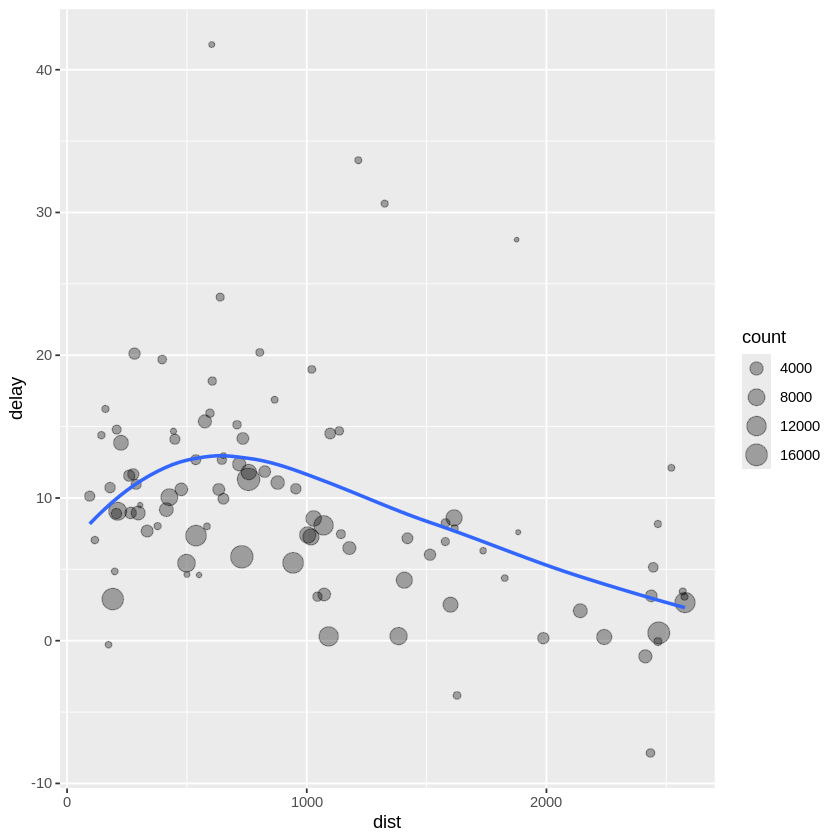

In [59]:
flights %>% group_by(dest) %>%
   summarise(count = n(), dist = mean(distance, na.rm = TRUE), delay = mean(arr_delay, na.rm = TRUE) ) %>%
   filter(count > 20, dest != "HNL") %>%
ggplot(mapping = aes(x = dist, y = delay)) +
  geom_point(aes(size = count), alpha = 1/3) +
  geom_smooth(se = FALSE)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


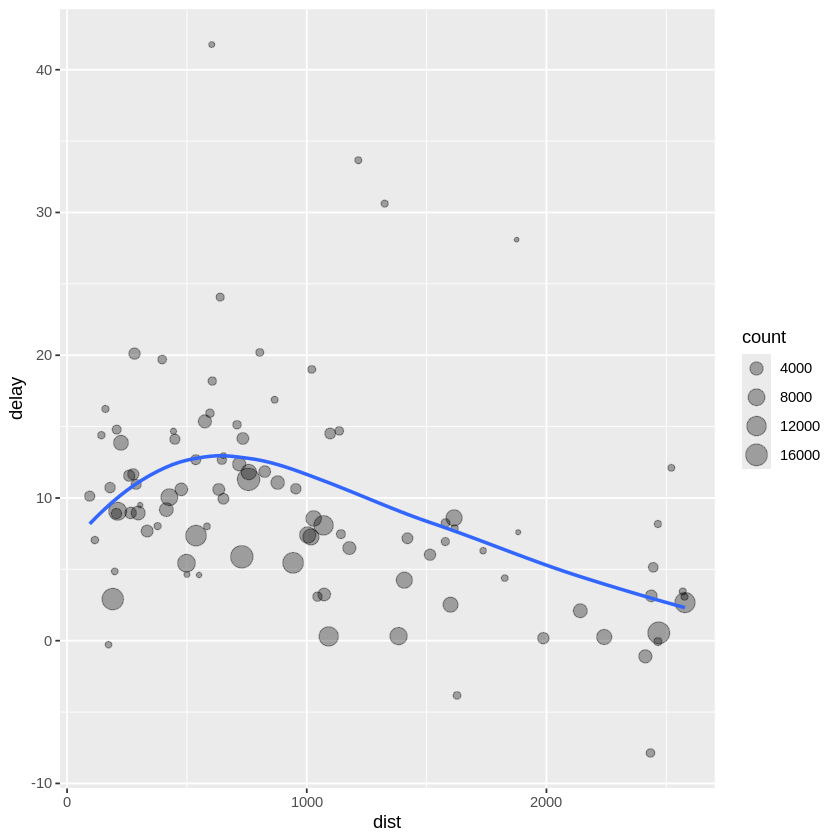

In [60]:
flights %>% group_by(dest) %>%
   summarise(count = n(), dist = mean(distance, na.rm = TRUE), delay = mean(arr_delay, na.rm = TRUE) ) %>%
   filter(count > 20, dest != "HNL") %>%
ggplot(mapping = aes(x = dist, y = delay)) +
  geom_point(aes(size = count), alpha = 1/3) +
  geom_smooth(se = FALSE)

5.6.7 Exercises
1. Brainstorm at least 5 different ways to assess the typical delay characteristics of a group of flights. Consider the following scenarios:
  - A flight is 15 minutes early 50% of the time, and 15 minutes late 50% of the time.
  - A flight is always 10 minutes late.
  - A flight is 30 minutes early 50% of the time, and 30 minutes late 50% of the time.
  - 99% of the time a flight is on time. 1% of the time it’s 2 hours late.  
- Which is more important: arrival delay or departure delay?
2. Come up with another approach that will give you the same output as not_cancelled %>% count(dest) and not_cancelled %>% count(tailnum, wt = distance) (without using count()).
3. Look at the number of cancelled flights per day. Is there a pattern? Is the proportion of cancelled flights related to the average delay?


## Data visualization - ggplot


In [61]:
mpg

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact


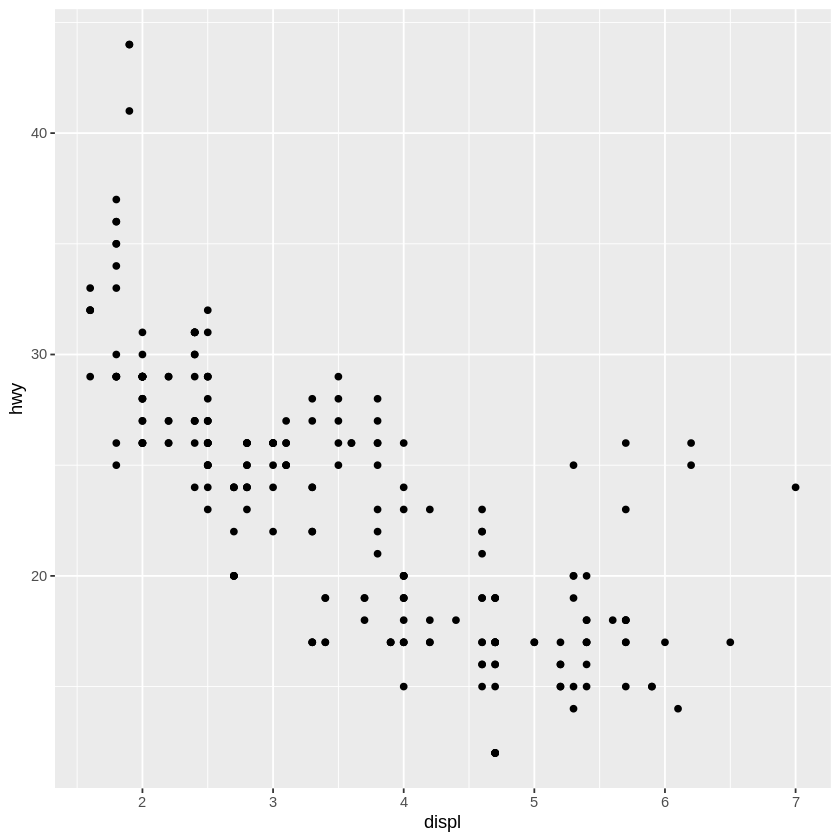

In [62]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy))

3.2.4 Exercises
1. Run ggplot(data = mpg). What do you see?
2. How many rows are in mpg? How many columns?
3. What does the drv variable describe? Read the help for ?mpg to find out.
4. Make a scatterplot of hwy vs cyl.
5. What happens if you make a scatterplot of class vs drv? Why is the plot not useful?

### Aesthetic mappings

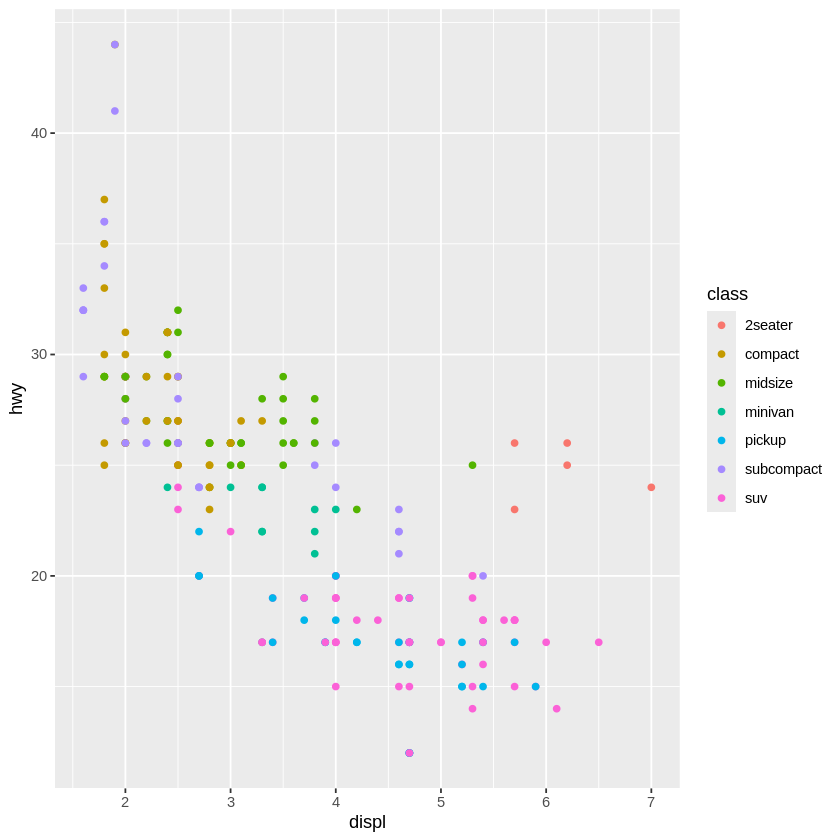

In [63]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, color = class))

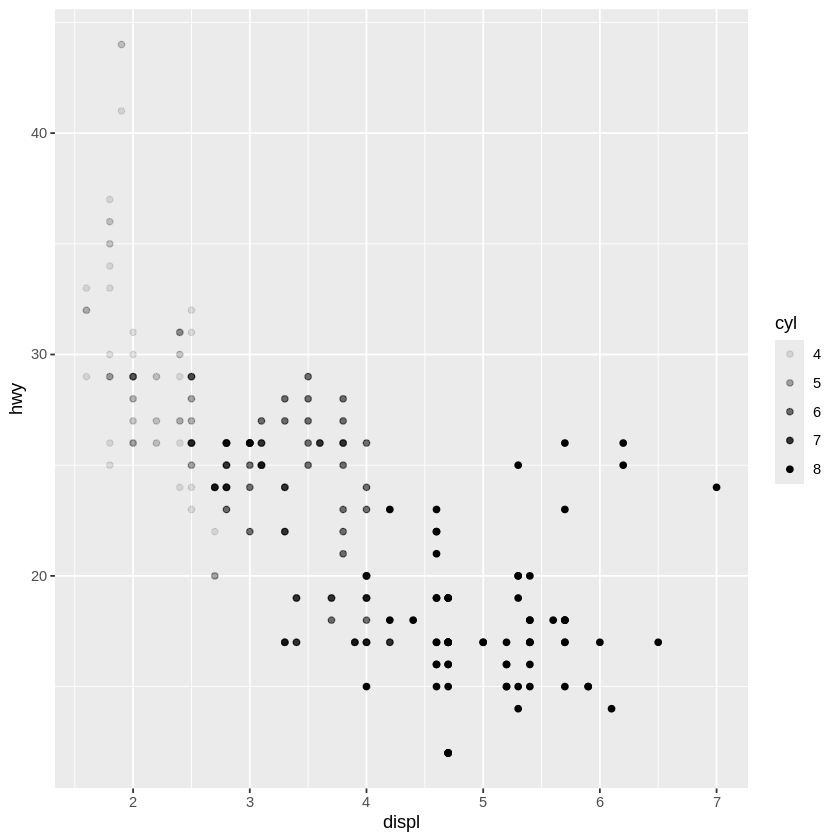

In [80]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, alpha = cyl))

Warning message:
“Using size for a discrete variable is not advised.”


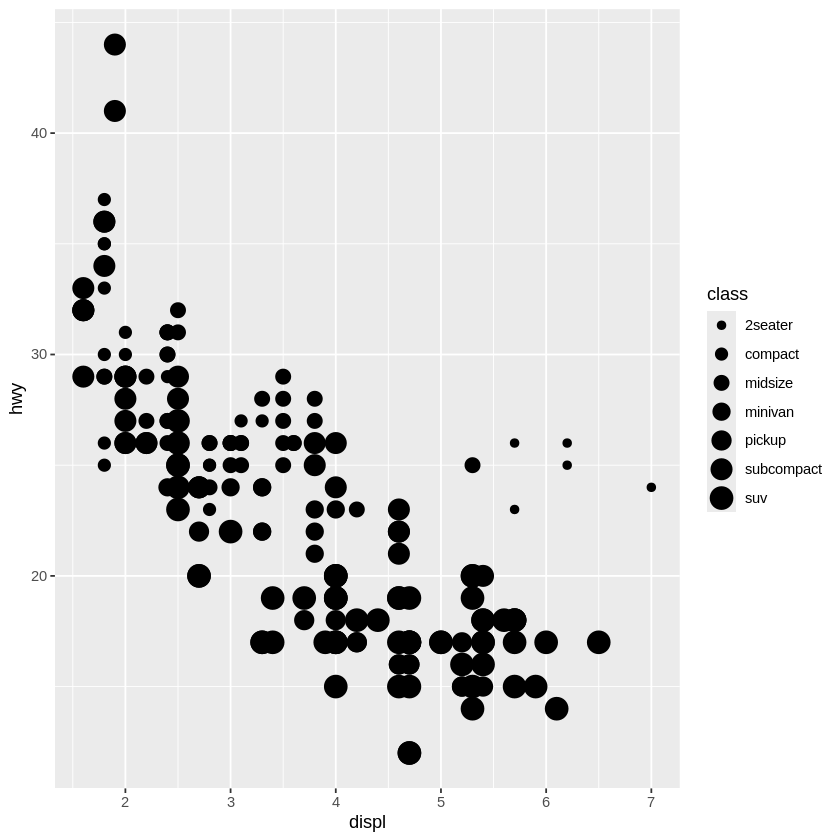

In [64]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, size = class))

Warning message:
“Using alpha for a discrete variable is not advised.”


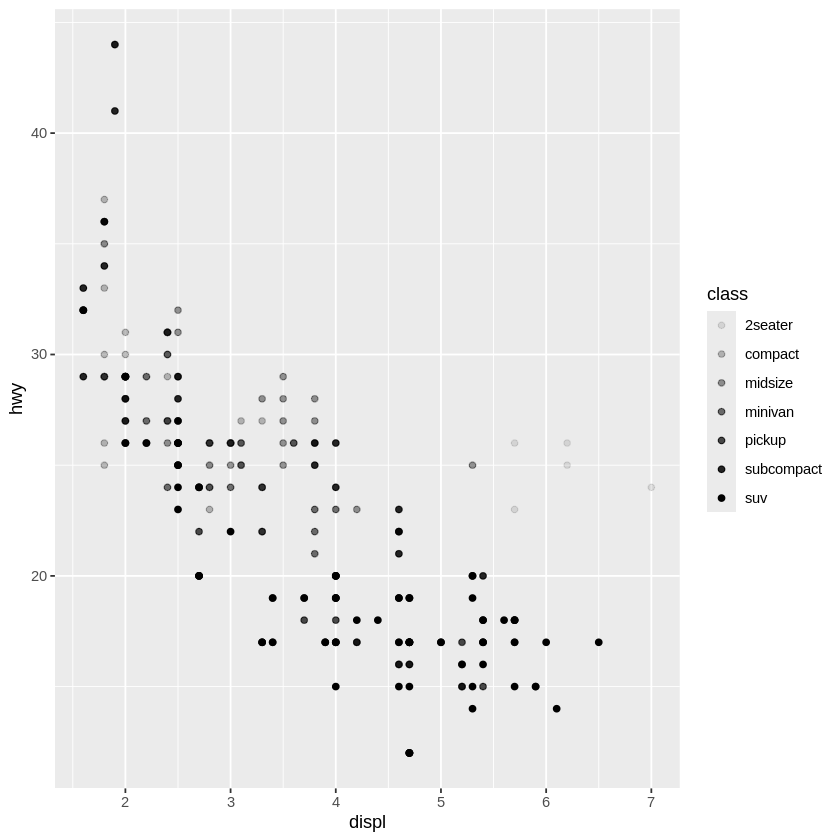

In [65]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, alpha = class))

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because more
than 6 becomes difficult to discriminate
ℹ you have requested 7 values. Consider specifying shapes manually if you need
  that many have them.”
Warning message:
“Removed 62 rows containing missing values or values outside the scale range
(`geom_point()`).”


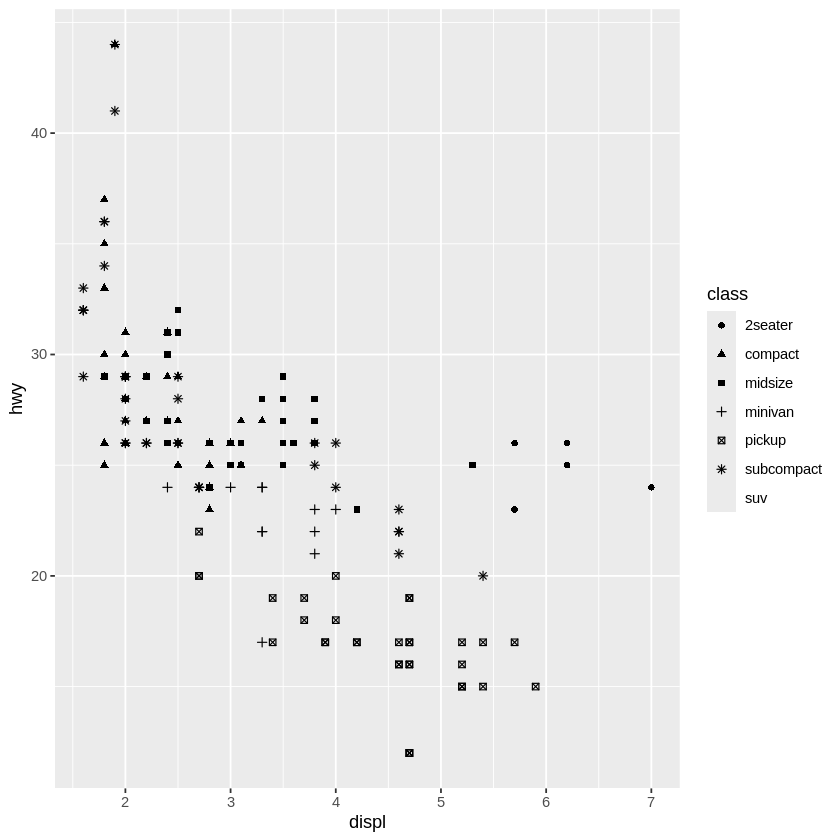

In [66]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, shape = class))

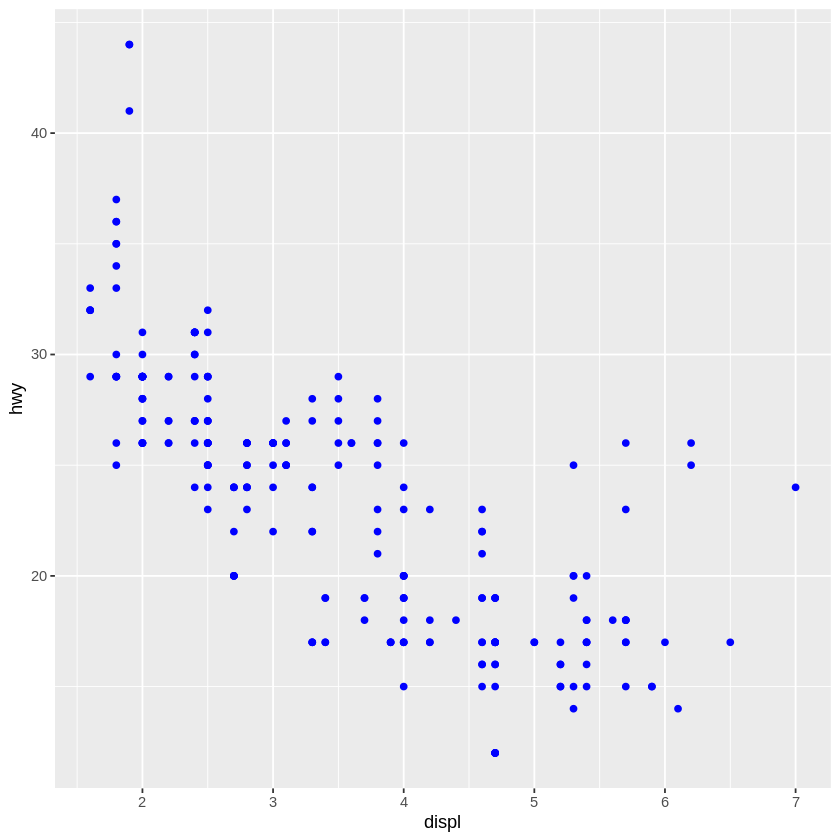

In [67]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy), color = "blue")

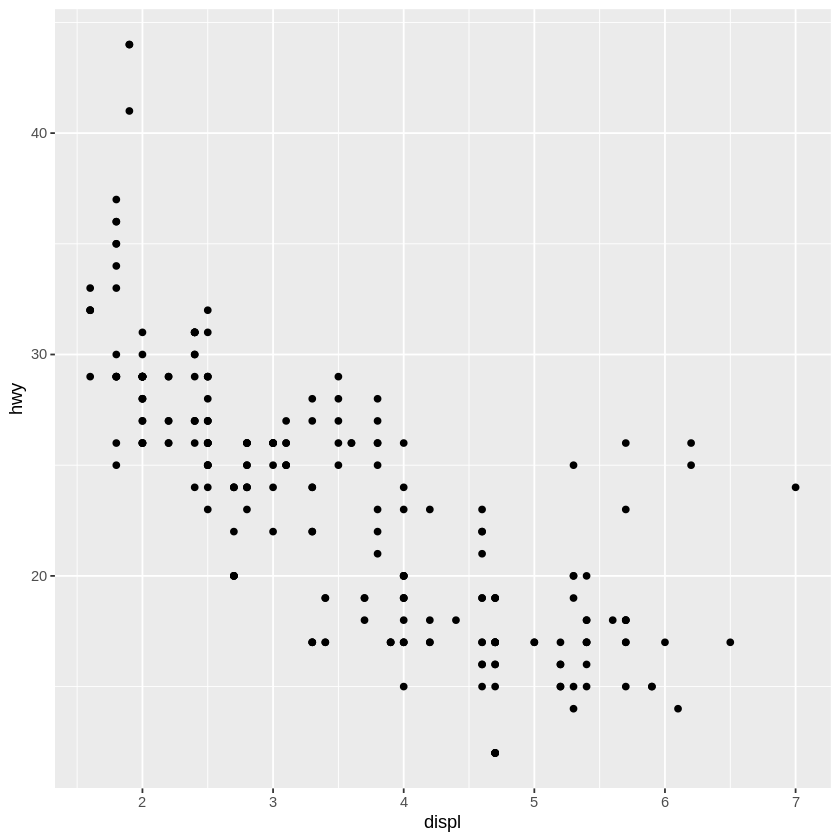

In [68]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy))

declare global mapping information in ggplot()

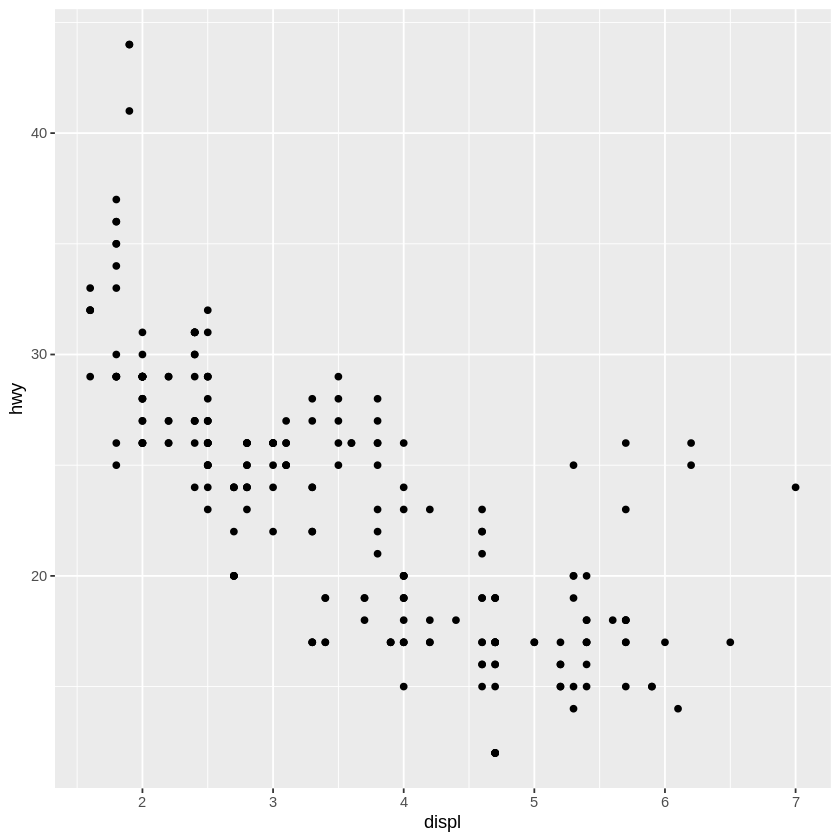

In [69]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
  geom_point()

Add graphical layers

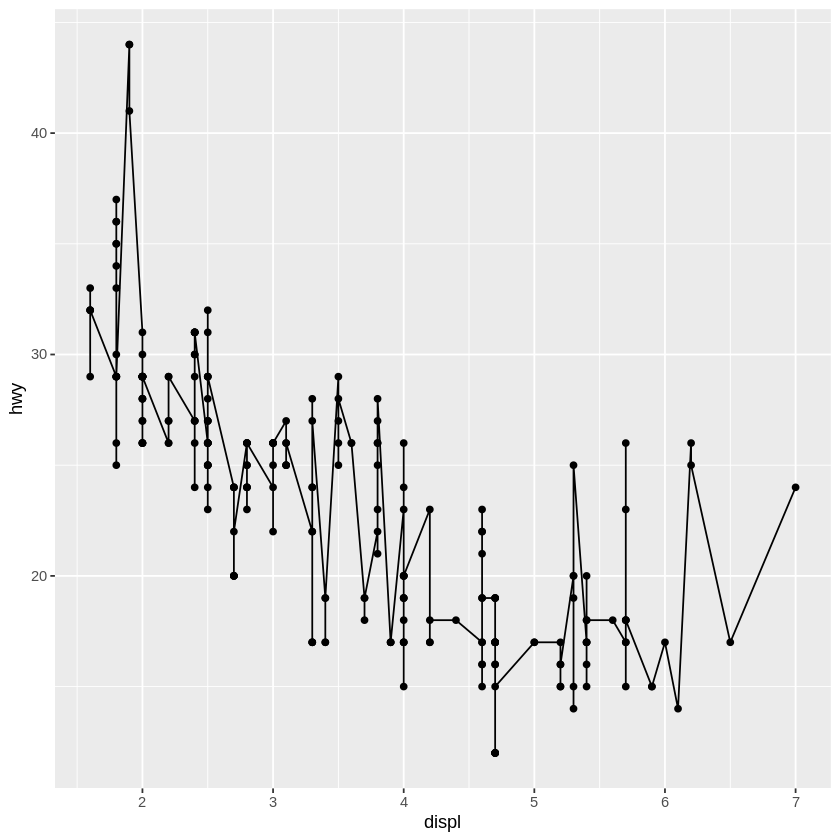

In [71]:
ggplot(data = mpg,(mapping = aes(x = displ, y = hwy)))+geom_point()+geom_line()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


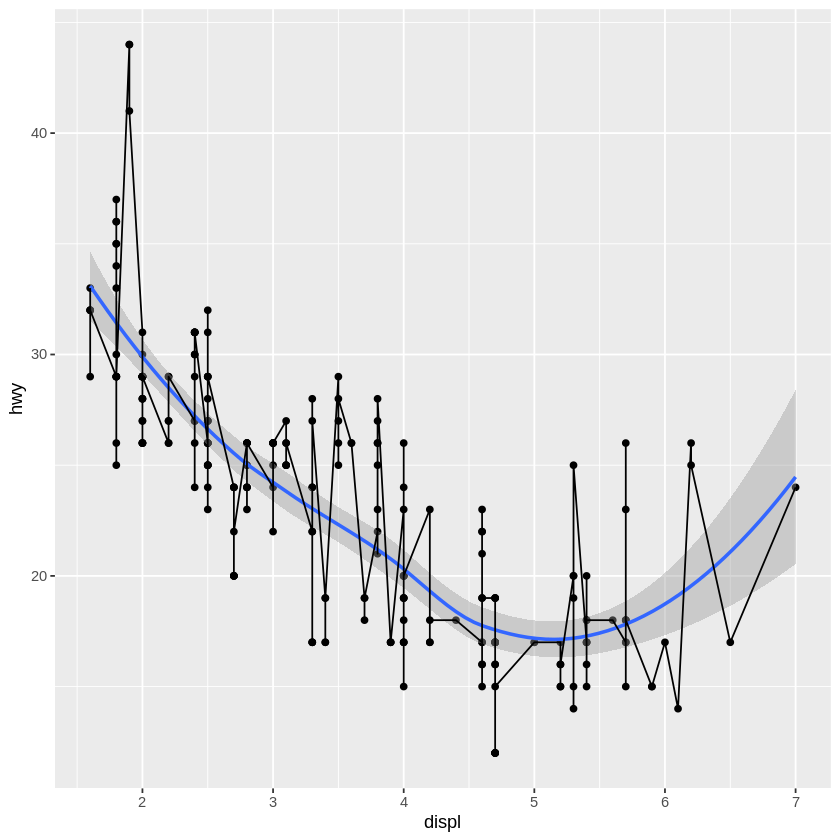

In [70]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) + geom_smooth(mapping = aes(x = displ, y = hwy)) + geom_line(mapping = aes(x = displ, y = hwy))

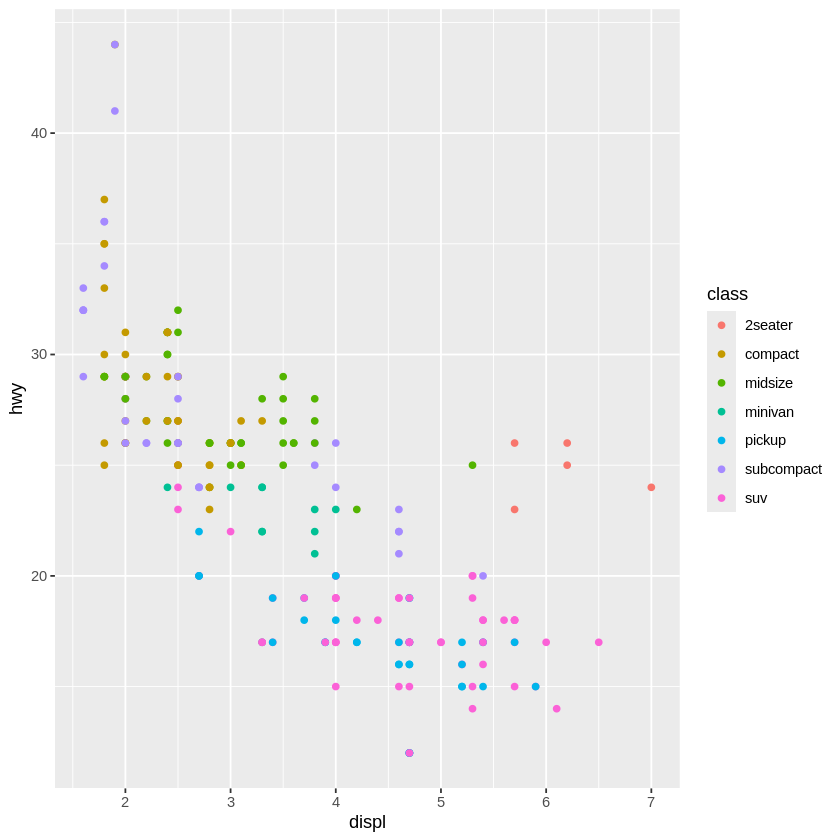

In [72]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, color = class)) + geom_point()

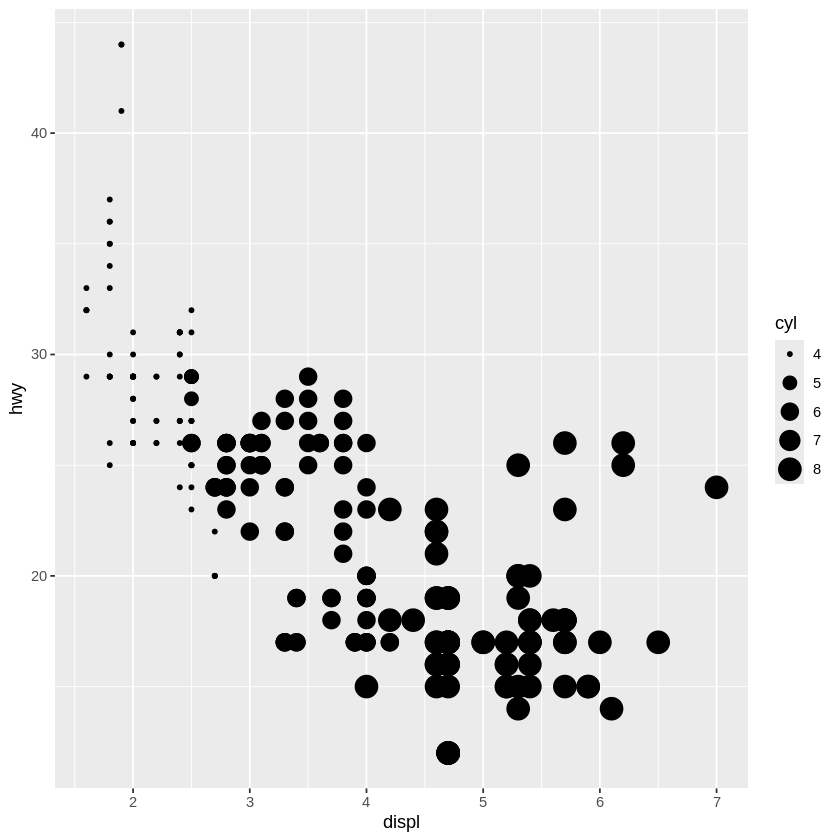

In [73]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, size = cyl)) + geom_point()

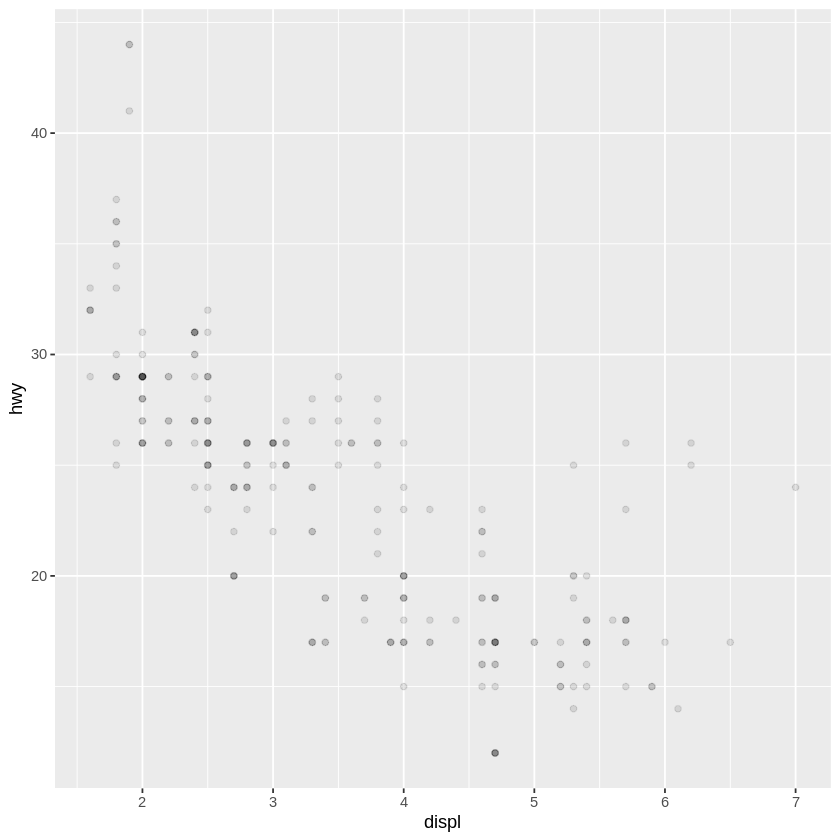

In [78]:
ggplot(data = mpg)+
geom_point(mapping = aes(x = displ, y = hwy),alpha=0.1)

Warning message:
“Using alpha for a discrete variable is not advised.”


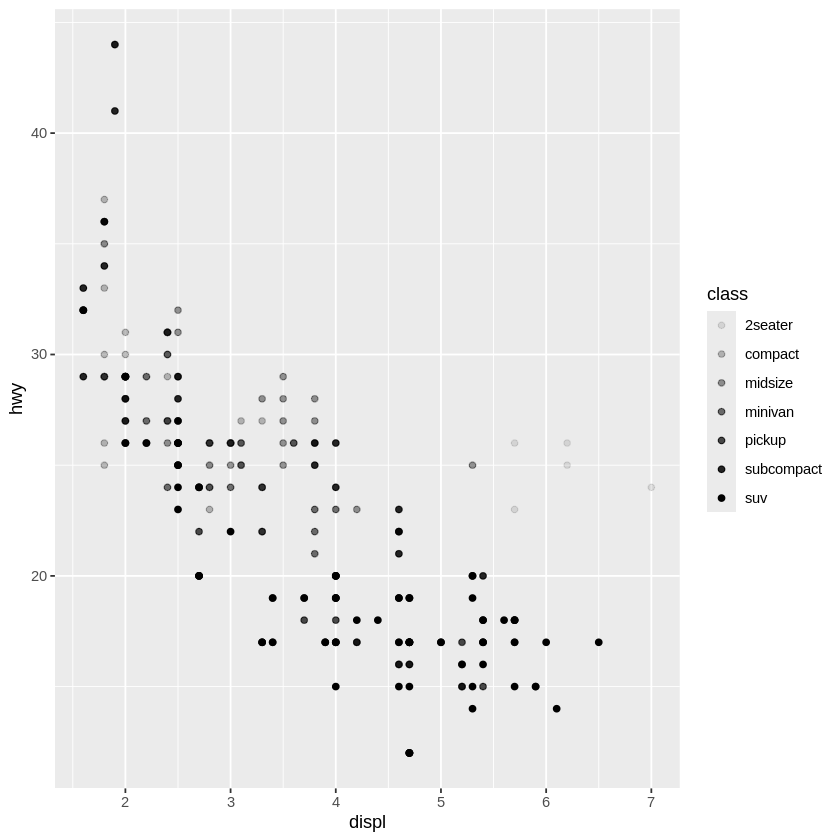

In [74]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, alpha = class)) + geom_point()

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because more
than 6 becomes difficult to discriminate
ℹ you have requested 7 values. Consider specifying shapes manually if you need
  that many have them.”
Warning message:
“Removed 62 rows containing missing values or values outside the scale range
(`geom_point()`).”


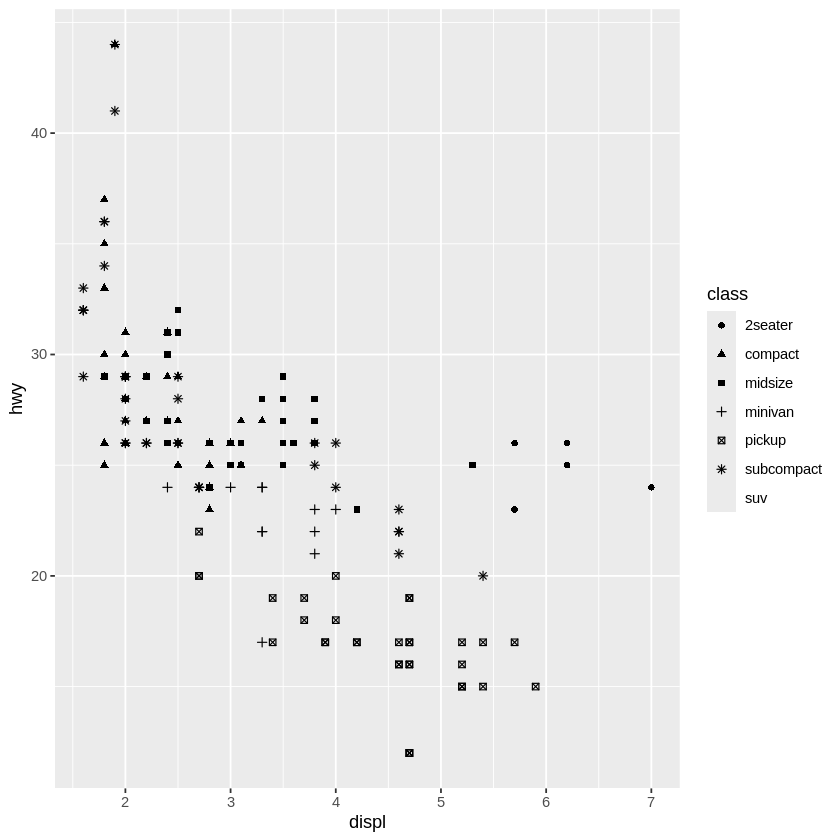

In [75]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, shape = class)) + geom_point()

3.3.1 Exercises
1. What’s gone wrong with this code? Why are the points not blue?

```
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, color = "blue"))
```
2. Which variables in mpg are categorical? Which variables are continuous? (Hint: type ?mpg to read the documentation for the dataset). How can you see this information when you run mpg?
3. Map a continuous variable to color, size, and shape. How do these aesthetics behave differently for categorical vs. continuous variables?
4. What happens if you map the same variable to multiple aesthetics?
5. What does the stroke aesthetic do? What shapes does it work with? (Hint: use ?geom_point)
6. What happens if you map an aesthetic to something other than a variable name, like aes(colour = displ < 5)? Note, you’ll also need to specify x and y.

### Facets

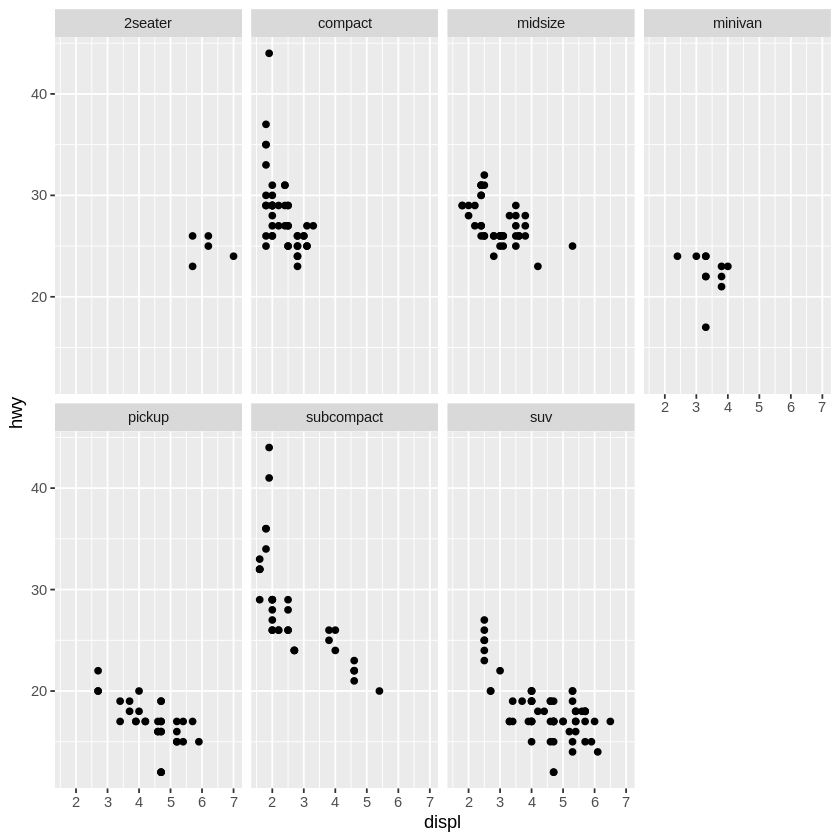

In [81]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_wrap(~ class, nrow = 2)

In [82]:
mpg %>% head()

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


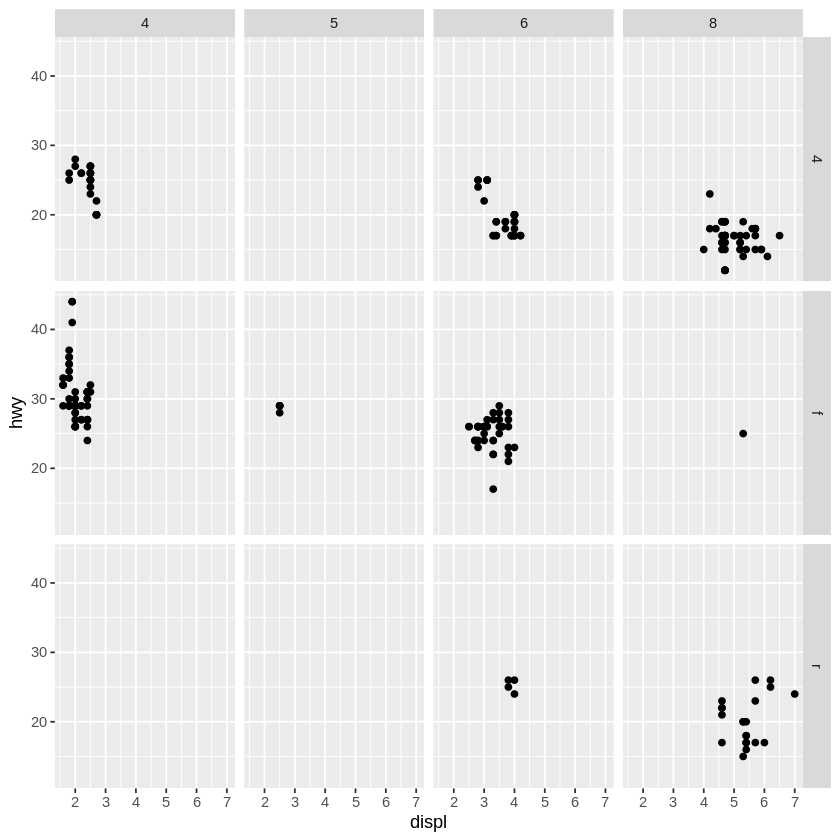

In [83]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_grid(drv ~ cyl)

3.5.1 Exercises
1. What happens if you facet on a continuous variable?

2. What do the empty cells in plot with facet_grid(drv ~ cyl) mean? How do they relate to this plot?
```
ggplot(data = mpg) +
  geom_point(mapping = aes(x = drv, y = cyl))
```
3. What plots does the following code make? What does . do?
```
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_grid(drv ~ .)
```
```
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_grid(. ~ cyl)
```
4. Take the first faceted plot in this section:

```
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_wrap(~ class, nrow = 2)
```
- What are the advantages to using faceting instead of the colour aesthetic? What are the disadvantages? How might the balance change if you had a larger dataset?

5. Read ?facet_wrap. What does nrow do? What does ncol do? What other options control the layout of the individual panels? Why doesn’t facet_grid() have nrow and ncol arguments?
6. When using facet_grid() you should usually put the variable with more unique levels in the columns. Why?

### Geometric objects

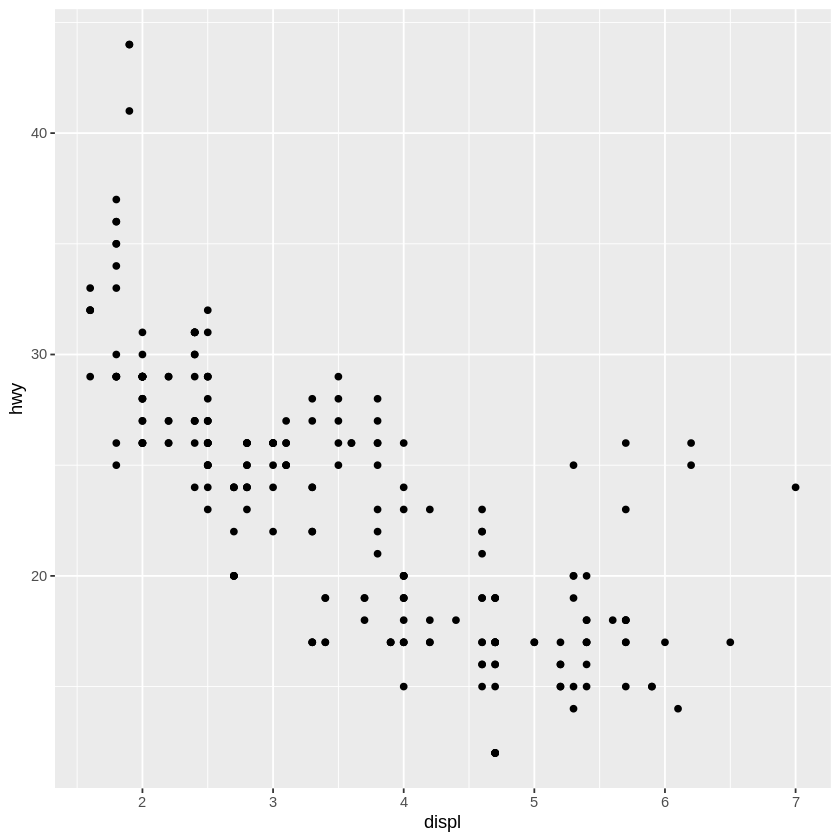

In [84]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy))

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


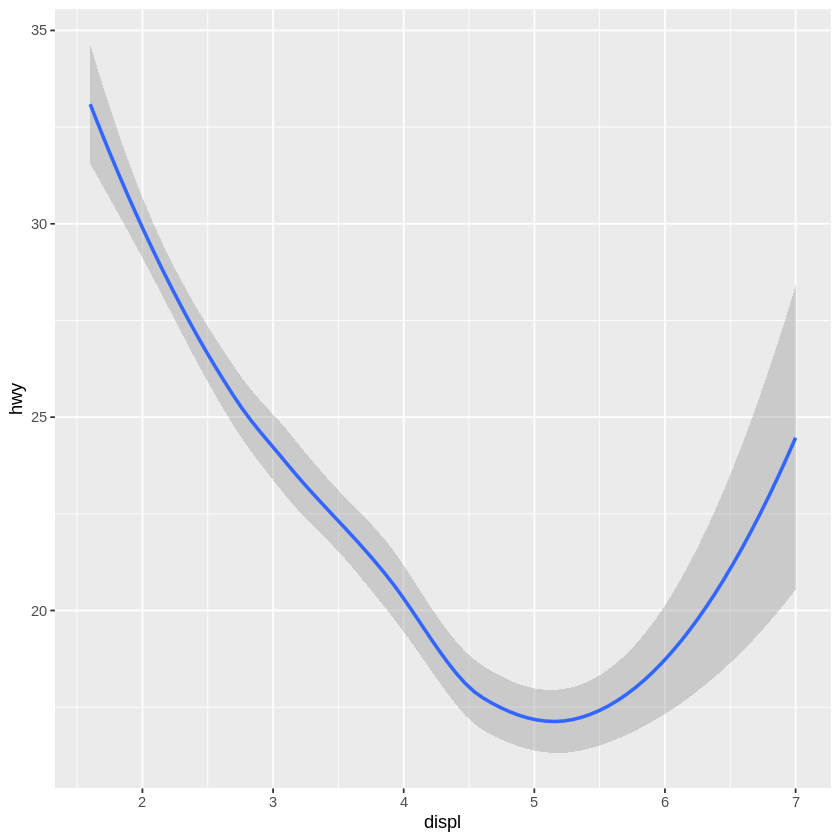

In [85]:
ggplot(data = mpg) +
  geom_smooth(mapping = aes(x = displ, y = hwy))

To display multiple geoms in the same plot, add multiple geom functions to ggplot():

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


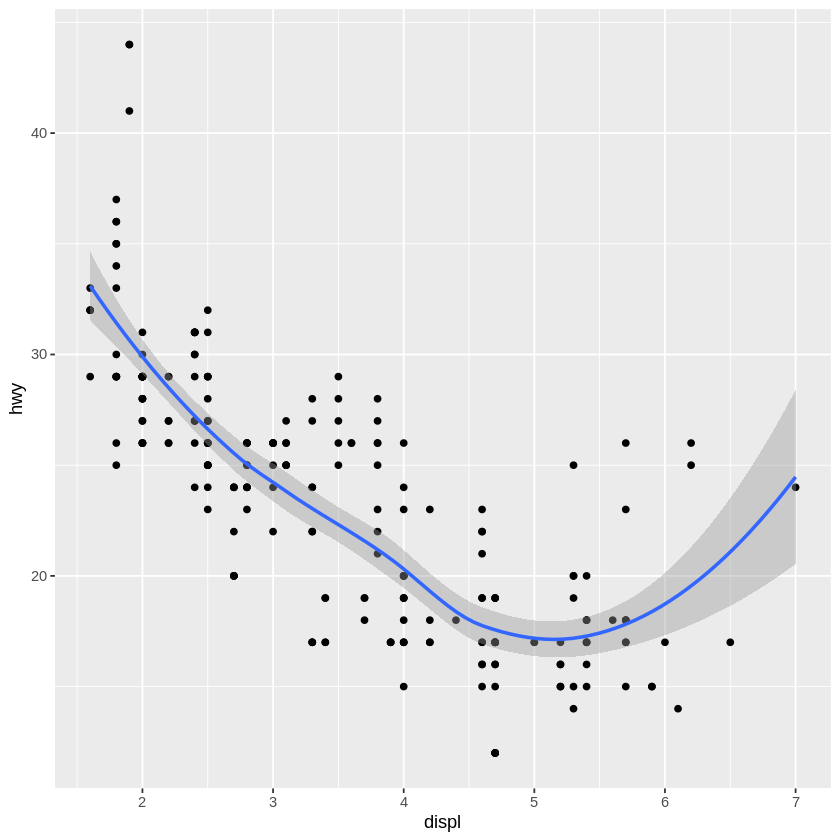

In [86]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
  geom_point() + geom_smooth()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


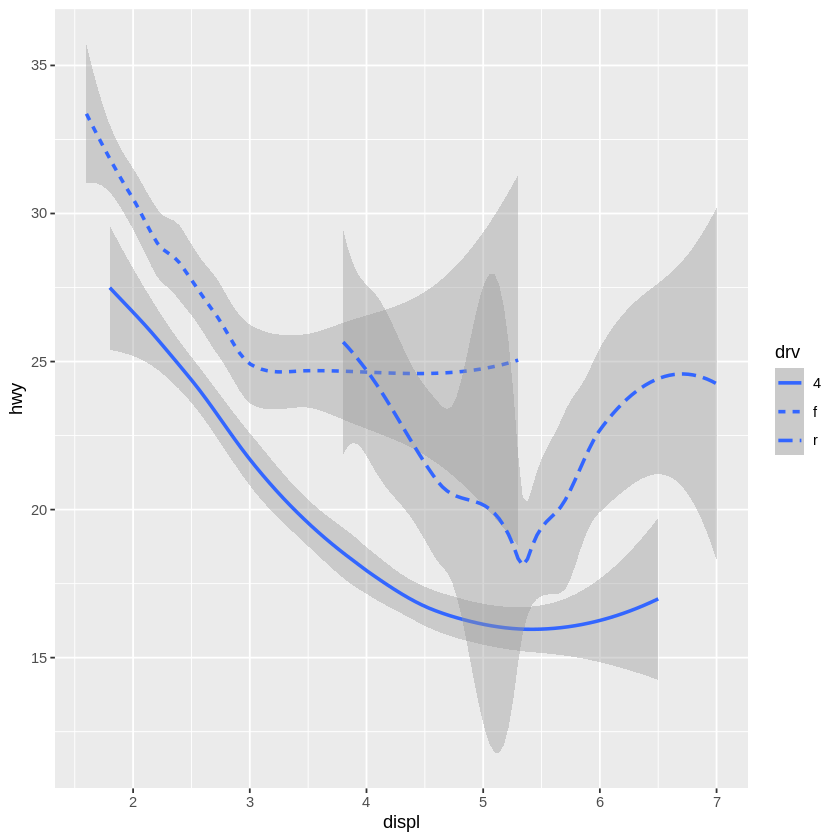

In [87]:
ggplot(data = mpg) +
  geom_smooth(mapping = aes(x = displ, y = hwy, linetype = drv))

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


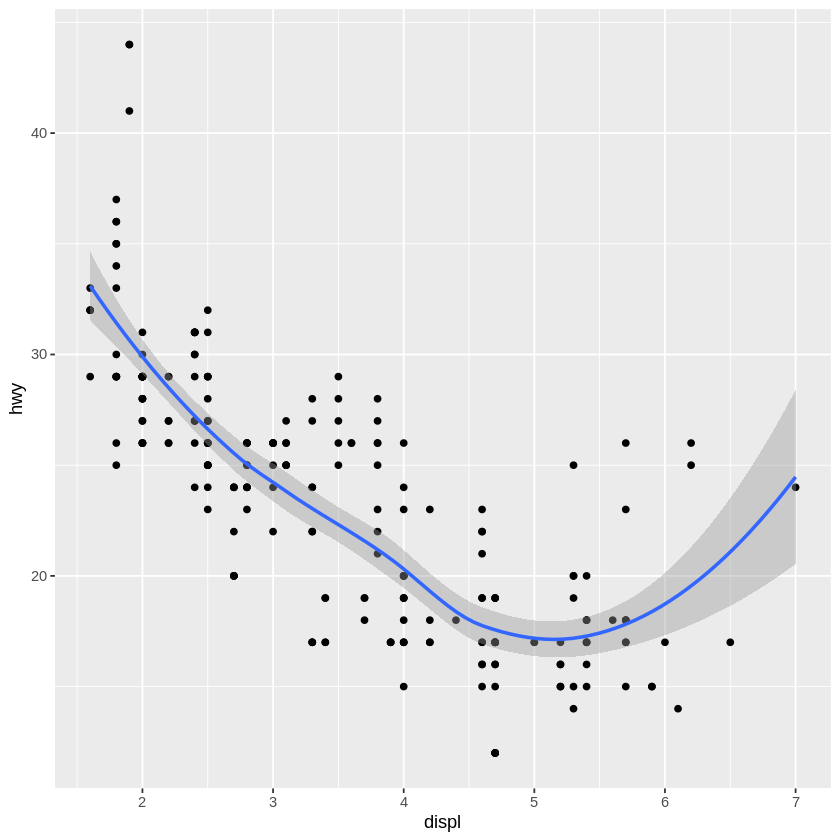

In [88]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  geom_smooth(mapping = aes(x = displ, y = hwy))

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


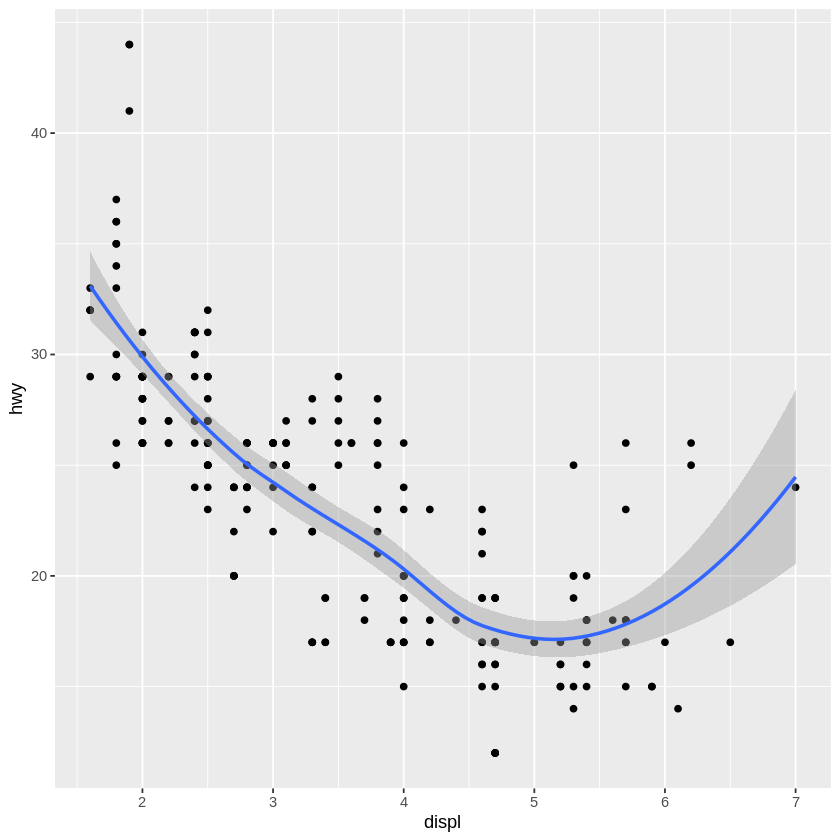

In [89]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
  geom_point() +
  geom_smooth()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


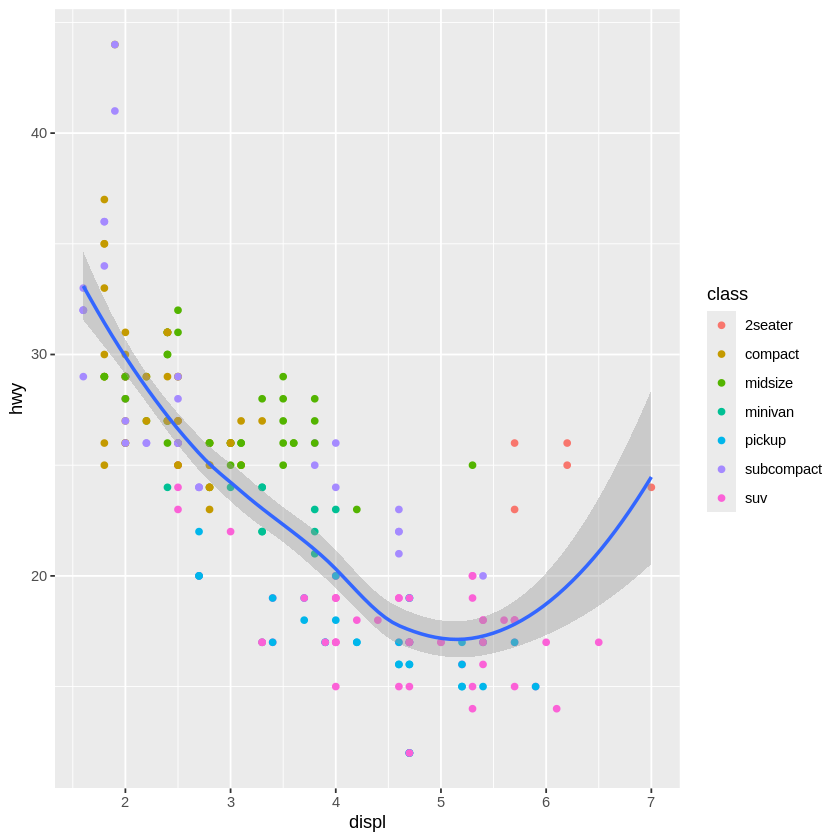

In [90]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
  geom_point(mapping = aes(color = class)) +
  geom_smooth()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


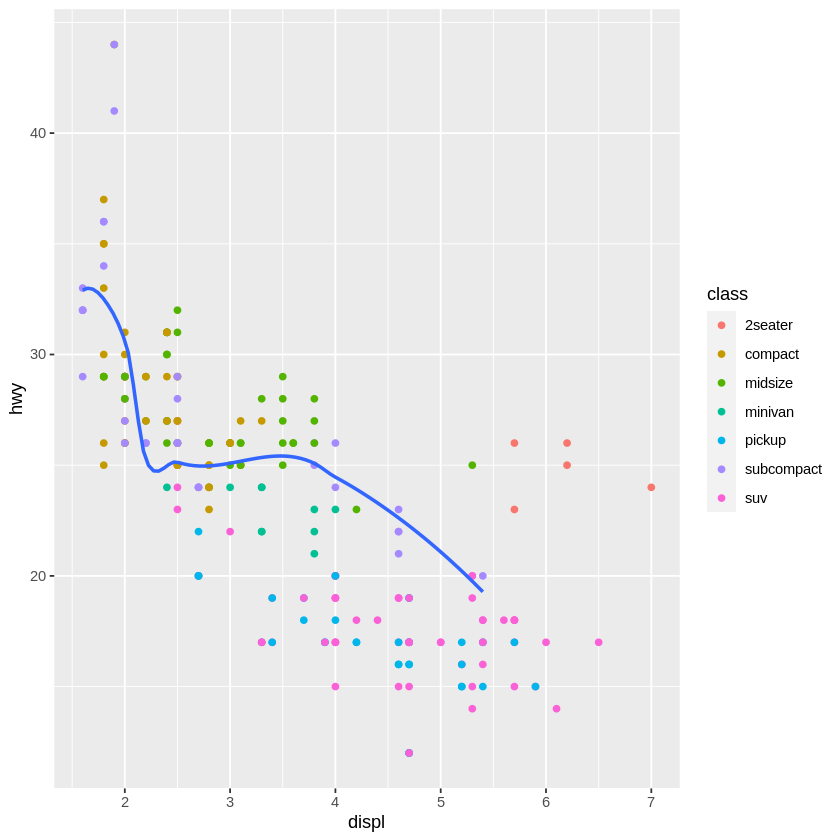

In [ ]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
  geom_point(mapping = aes(color = class)) +
  geom_smooth(data = filter(mpg, class == "subcompact"), se = FALSE)

3.6.1 Exercises
1. What geom would you use to draw a line chart? A boxplot? A histogram? An area chart?
2. Run this code in your head and predict what the output will look like. Then, run the code in R and check your predictions.
```
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, color = drv)) +
  geom_point() +
  geom_smooth(se = FALSE)
```
3. What does show.legend = FALSE do? What happens if you remove it?  
Why do you think I used it earlier in the chapter?
4. What does the se argument to geom_smooth() do?
5. Will these two graphs look different? Why/why not?
```
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
  geom_point() +
  geom_smooth()
```
```
ggplot() +
  geom_point(data = mpg, mapping = aes(x = displ, y = hwy)) +
  geom_smooth(data = mpg, mapping = aes(x = displ, y = hwy))
```
6. Recreate the R code necessary to generate the following graphs.
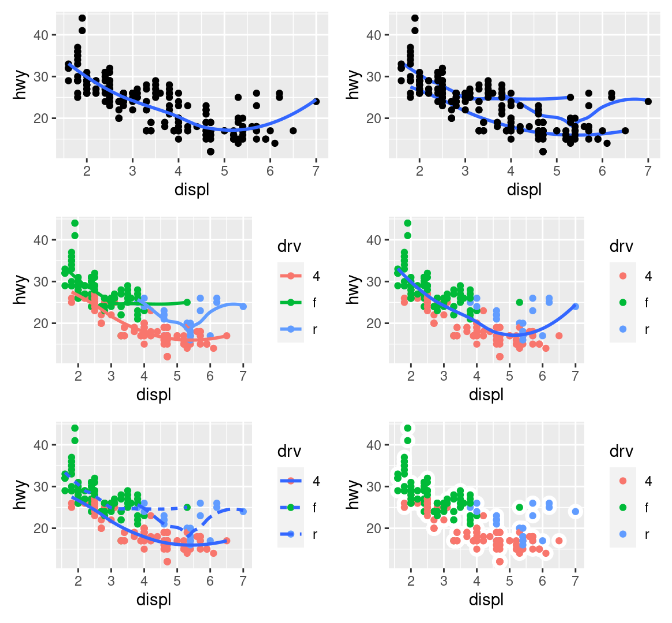

### Statistical transformations

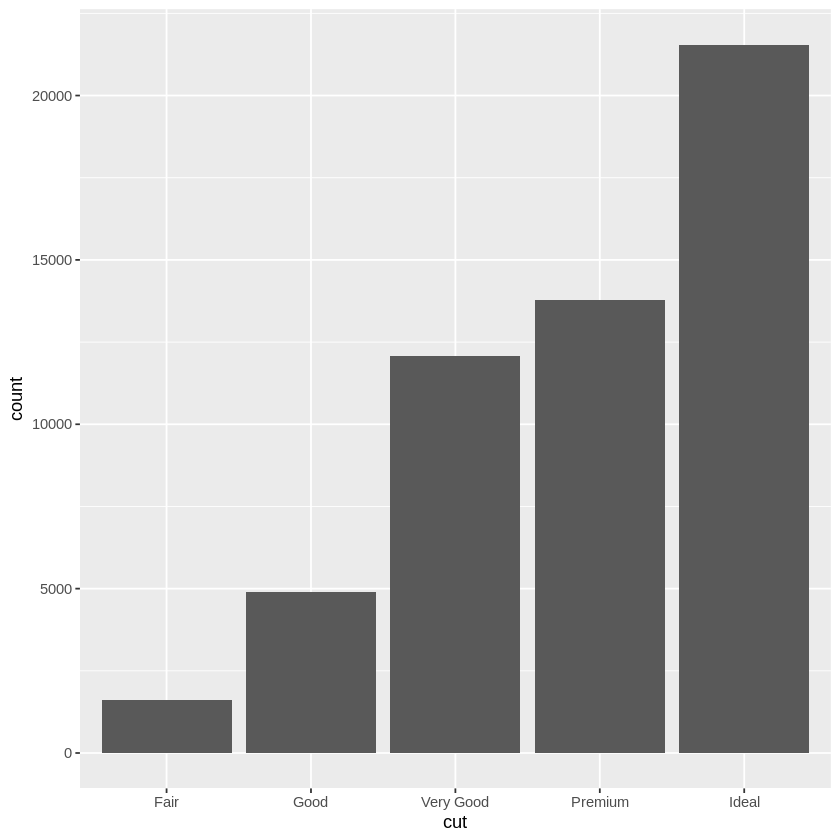

In [92]:
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut))

In [93]:
diamonds

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48
0.24,Very Good,I,VVS1,62.3,57,336,3.95,3.98,2.47
0.26,Very Good,H,SI1,61.9,55,337,4.07,4.11,2.53
0.22,Fair,E,VS2,65.1,61,337,3.87,3.78,2.49


In [94]:
table(diamonds$cut)


     Fair      Good Very Good   Premium     Ideal 
     1610      4906     12082     13791     21551 

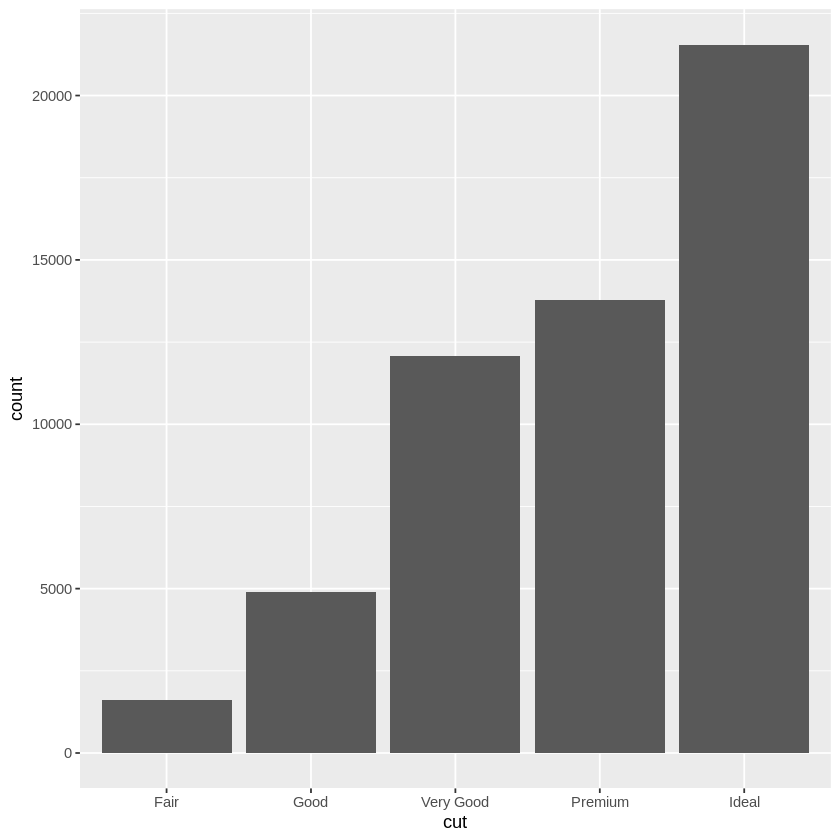

In [95]:
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut))

In [96]:
demo <- tribble(
  ~cut,         ~freq,
  "Fair",       1610,
  "Good",       4906,
  "Very Good",  12082,
  "Premium",    13791,
  "Ideal",      21551
)
demo

cut,freq
<chr>,<dbl>
Fair,1610
Good,4906
Very Good,12082
Premium,13791
Ideal,21551


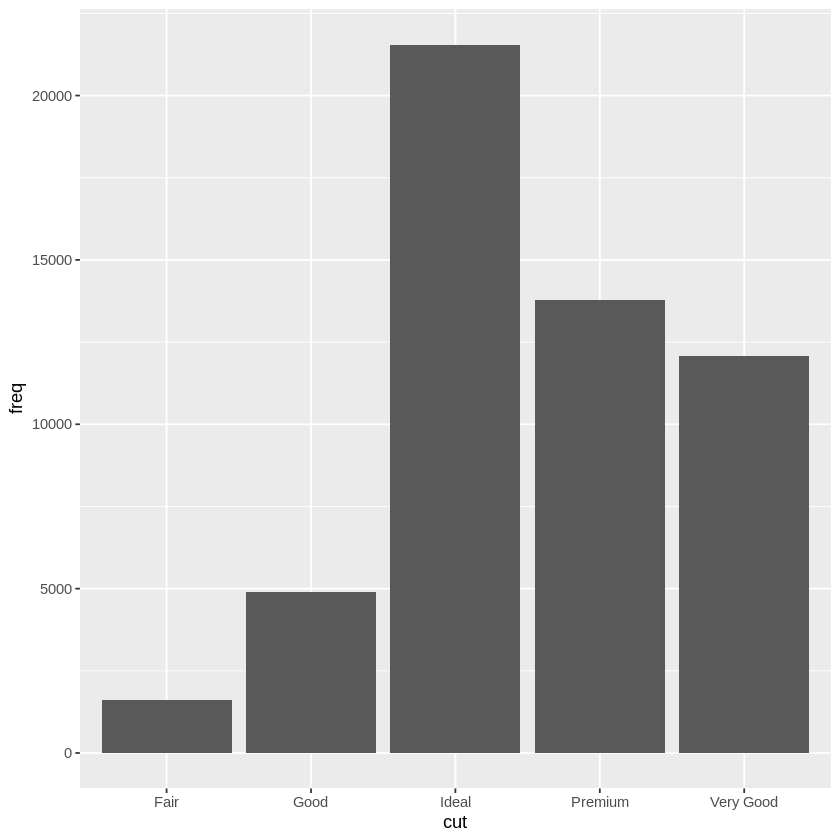

In [97]:
ggplot(data = demo) +
  geom_bar(mapping = aes(x = cut, y = freq), stat = "identity")

Warning message:
“`stat(prop)` was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(prop)` instead.”


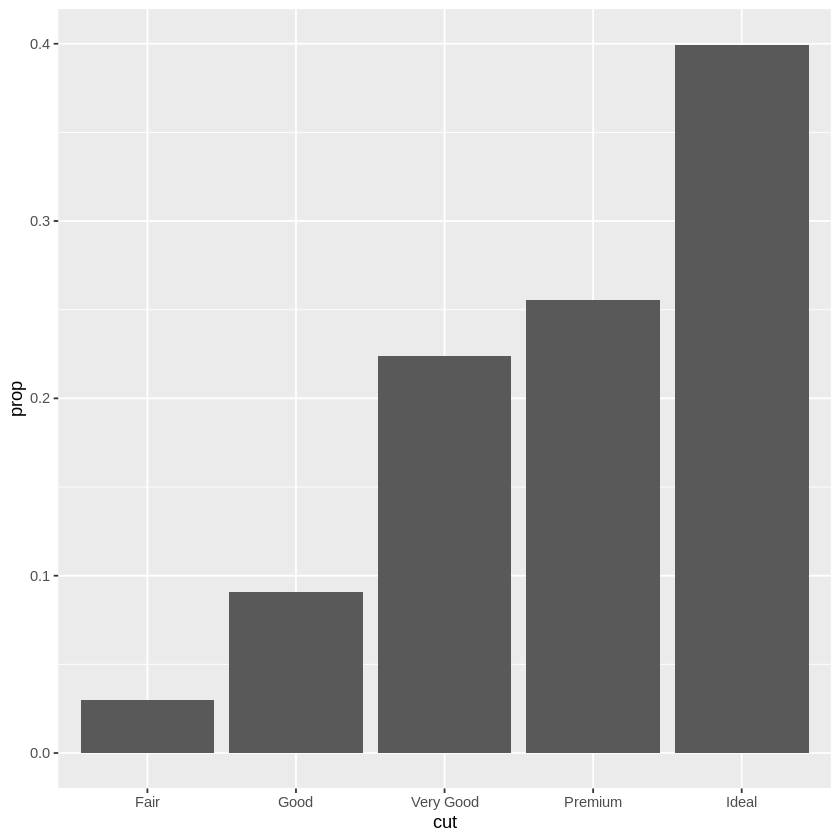

In [98]:
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, y = stat(prop), group = 1))

3.7.1 Exercises
1. What is the default geom associated with stat_summary()? How could you rewrite the previous plot to use that geom function instead of the stat function?
2. What does geom_col() do? How is it different to geom_bar()?
3. Most geoms and stats come in pairs that are almost always used in concert. Read through the documentation and make a list of all the pairs. What do they have in common?
4. What variables does stat_smooth() compute? What parameters control its behaviour?
5. In our proportion bar chart, we need to set group = 1. Why? In other words what is the problem with these two graphs?
```
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, y = after_stat(prop)))
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, fill = color, y = after_stat(prop)))
```


### Position adjustments

You can colour a bar chart using either the colour aesthetic, or, more usefully, fill:

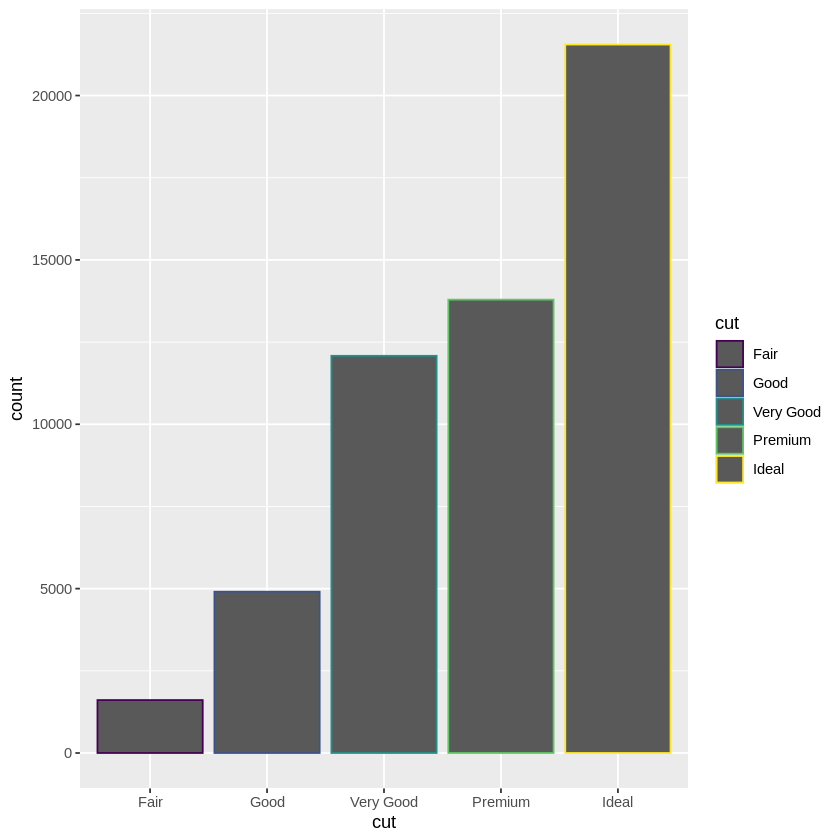

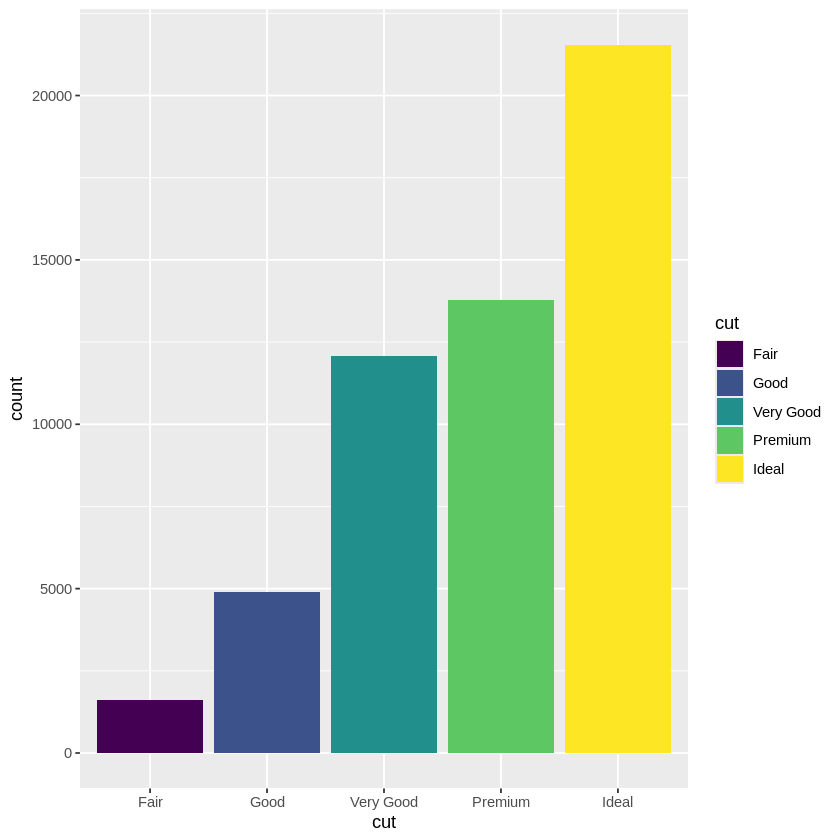

In [91]:
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, colour = cut))
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, fill = cut))

If you map the fill aesthetic to another variable, like clarity, the bars are automatically stacked.

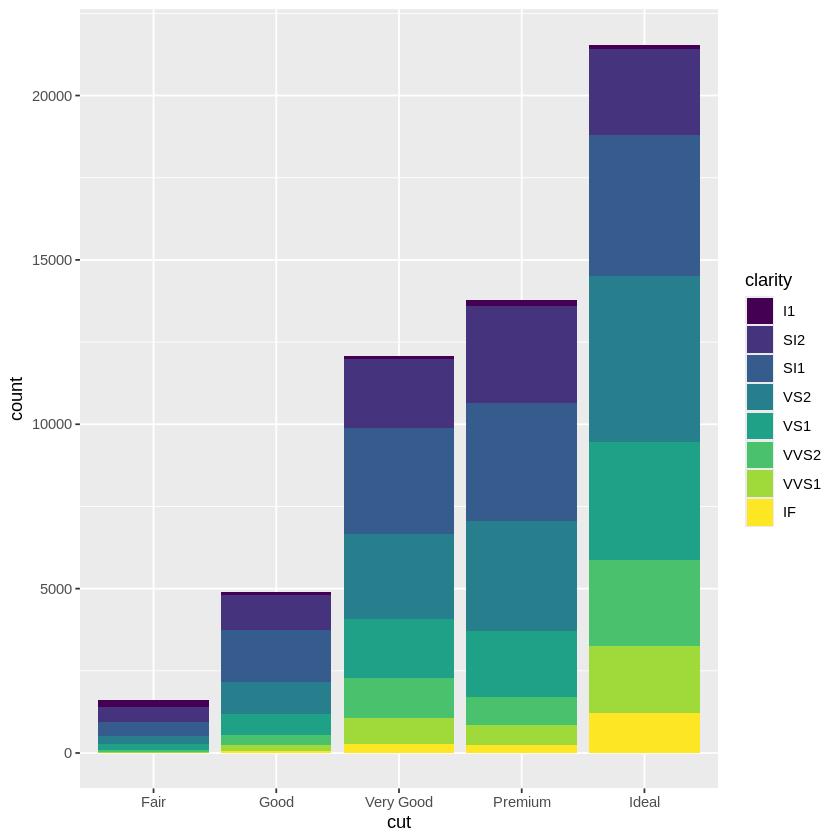

In [99]:
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, fill = clarity))

The stacking is performed automatically by the position adjustment specified by the position argument. If you don’t want a stacked bar chart, you can use one of three other options: "identity", "dodge" or "fill".

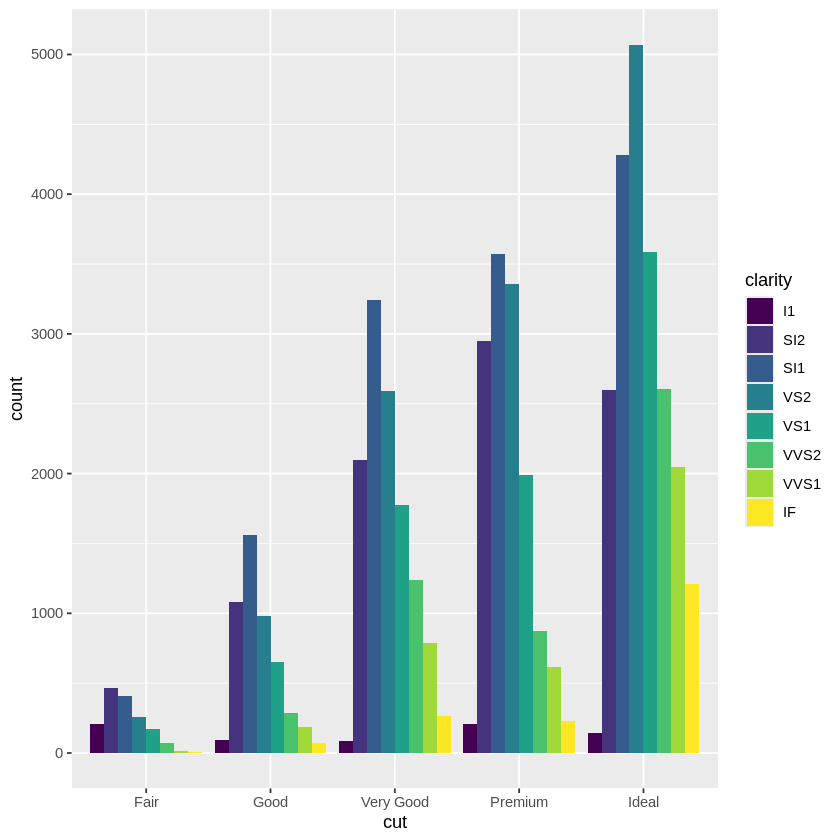

In [100]:
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge")

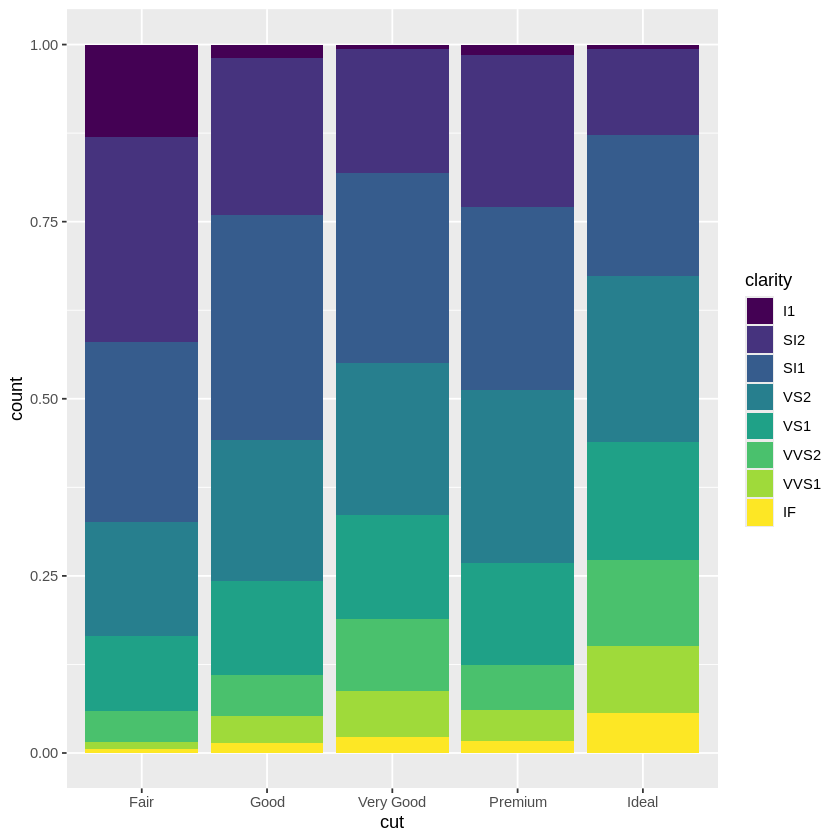

In [101]:
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "fill")

#### Think how you will visualize a distribution of departure delay (dep_delay).


In [102]:
flights %>% group_by(origin) %>%
summarise(delay = mean(dep_delay, na.rm = TRUE), sd_delay = sd(dep_delay, na.rm = TRUE))

origin,delay,sd_delay
<chr>,<dbl>,<dbl>
EWR,15.10795,41.32370
JFK,12.11216,39.03507
LGA,10.34688,39.99302


Warning message:
“Removed 8255 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


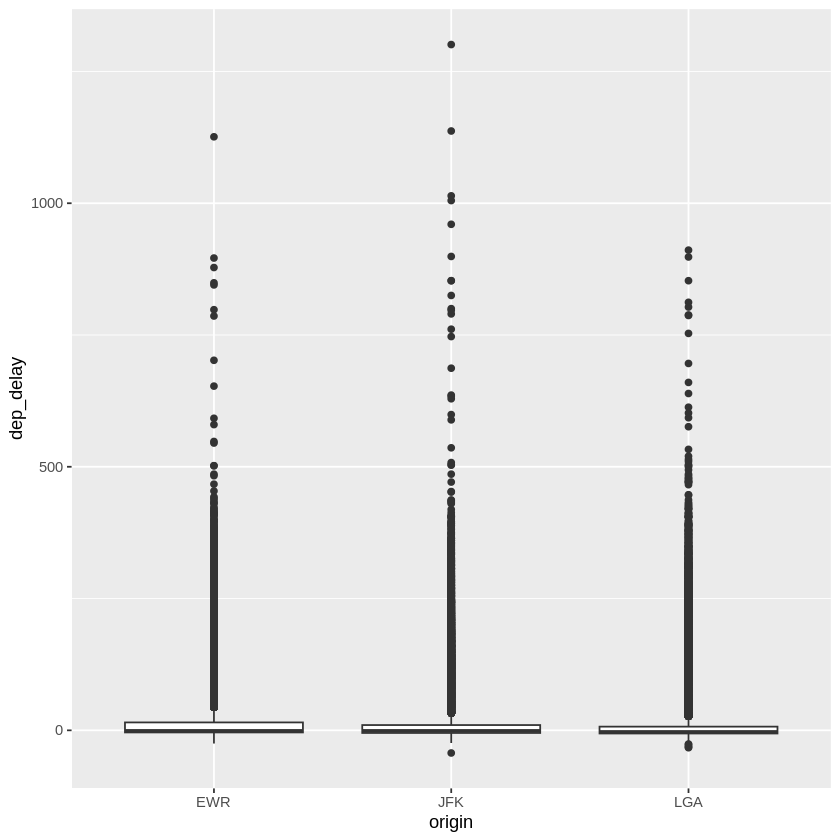

In [103]:

flights %>% ggplot(aes(x = origin, y=dep_delay )) + geom_boxplot()

Warning message:
“Removed 8255 rows containing non-finite outside the scale range
(`stat_ydensity()`).”


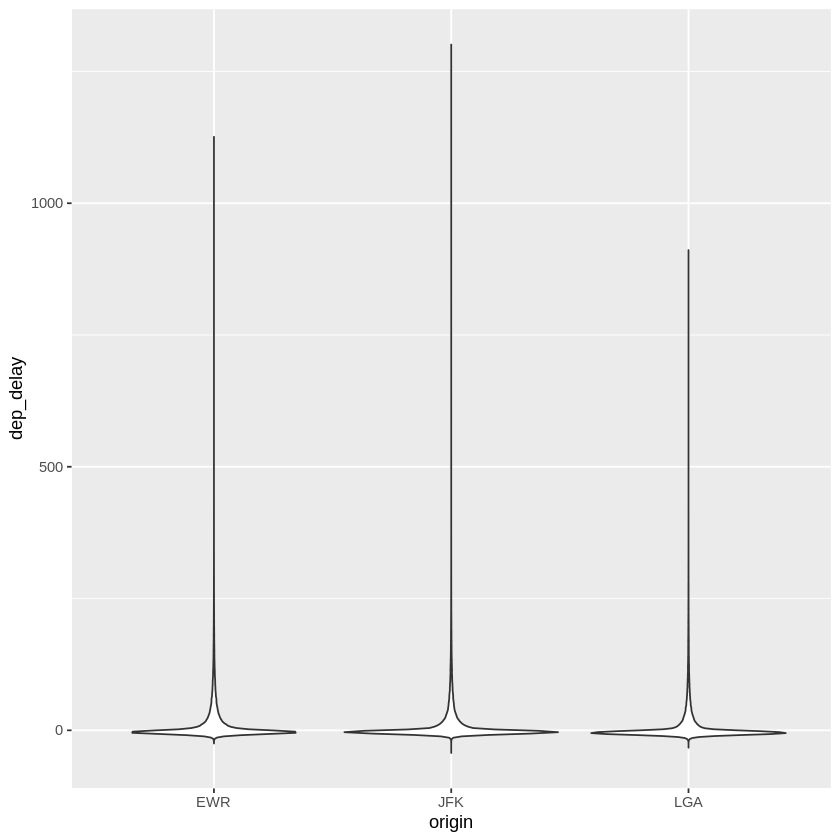

In [104]:
flights %>% ggplot(aes(x = origin, y=dep_delay )) + geom_violin()

#### Think how you will visualize monthly departure delay ?

In [105]:
flights %>% group_by(month) %>% summarise(delay = mean(dep_delay, na.rm = TRUE), delay_N = n(), delay_sd = sd(dep_delay, na.rm = TRUE))

month,delay,delay_N,delay_sd
<int>,<dbl>,<int>,<dbl>
1,10.036665,27004,36.39031
2,10.816843,24951,36.26655
3,13.227076,28834,40.13097
4,13.938038,28330,42.96626
5,12.986859,28796,39.35283
6,20.846332,28243,51.45694
7,21.727787,29425,51.61608
8,12.611040,29327,37.66692
9,6.722476,27574,35.61480


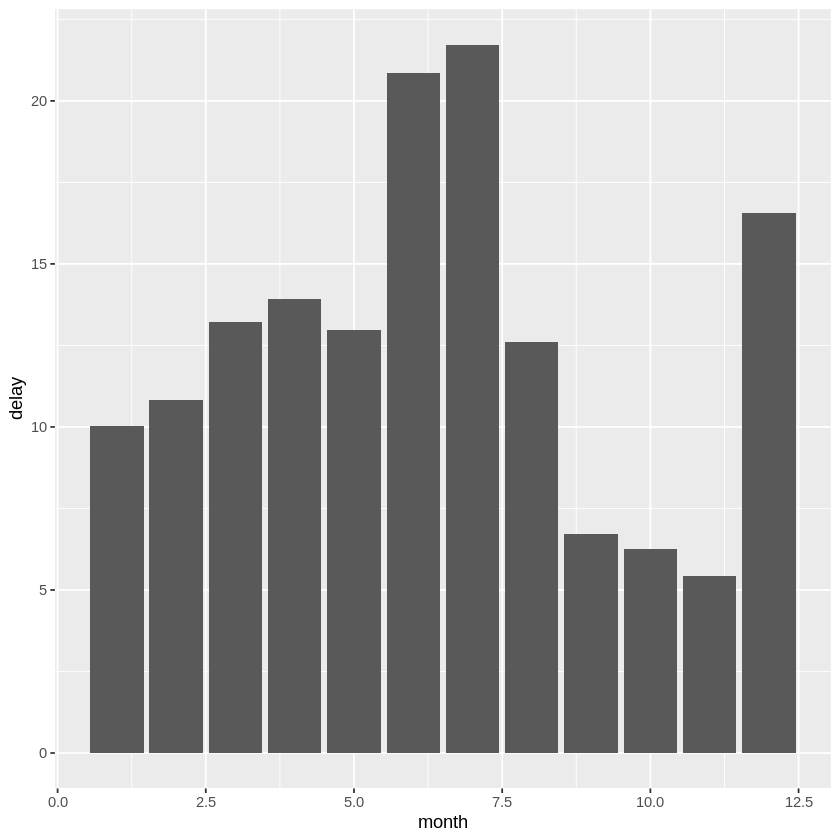

In [106]:
flights %>% group_by(month) %>%
  summarise(delay = mean(dep_delay, na.rm = TRUE), delay_N = n(), delay_sd = sd(dep_delay, na.rm = TRUE))  %>%
  ggplot(aes(x = month, y = delay) ) +
    geom_bar(stat = "identity", position = "dodge")

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


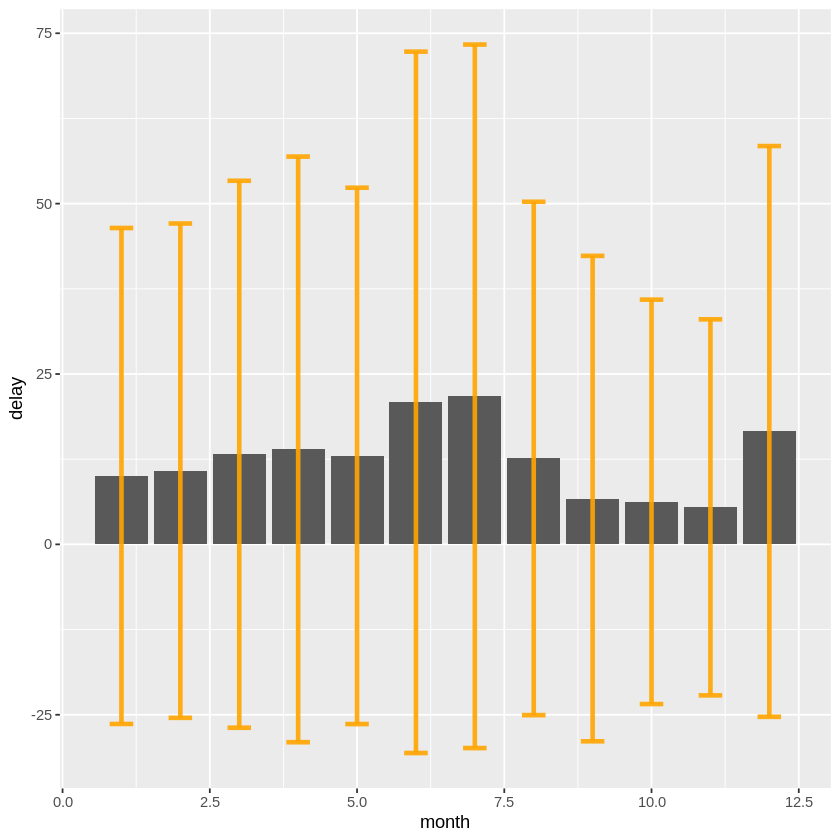

In [107]:
# Normal 분포 일때는 boxplot이 적합
flights %>% group_by(month) %>%
  summarise(delay = mean(dep_delay, na.rm = TRUE), delay_N = n(), delay_sd = sd(dep_delay, na.rm = TRUE))  %>%
  ggplot(aes(x = month, y = delay) ) +
    geom_bar(stat = "identity", position = "dodge") +
    geom_errorbar( aes(x=month, ymin=delay-delay_sd, ymax=delay+delay_sd), width=0.4, colour="orange", alpha=0.9, size=1.3) # 평균과 분산 나타내기

Warning message:
“Removed 8255 rows containing non-finite outside the scale range
(`stat_ydensity()`).”


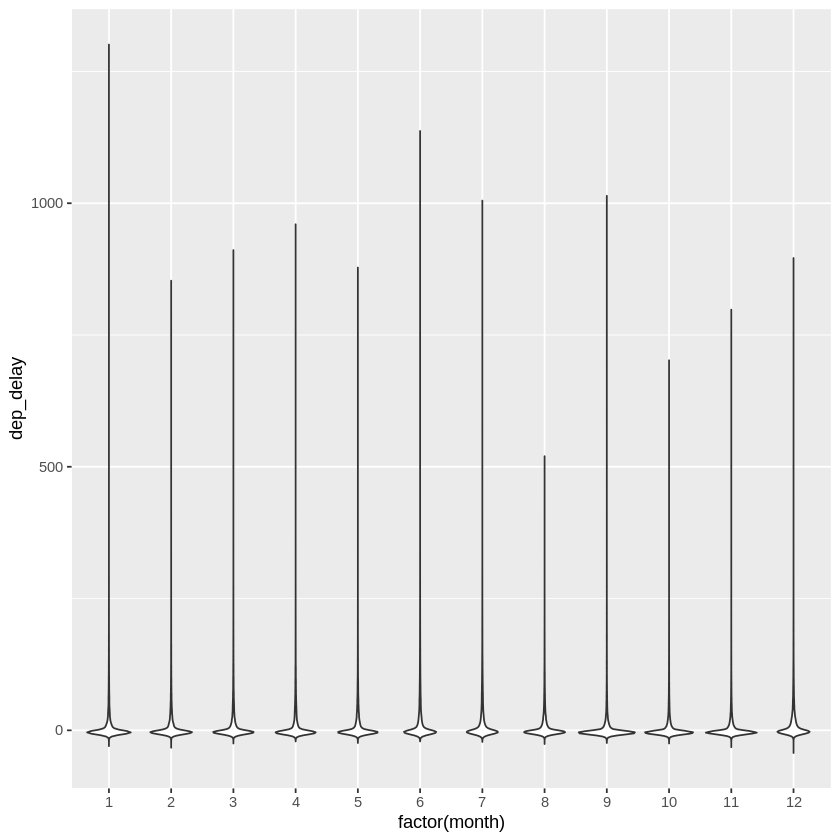

In [108]:
# skewed 된 경우
flights %>% ggplot(aes(x = factor(month), y=dep_delay )) + geom_violin()

#### cordinate flip

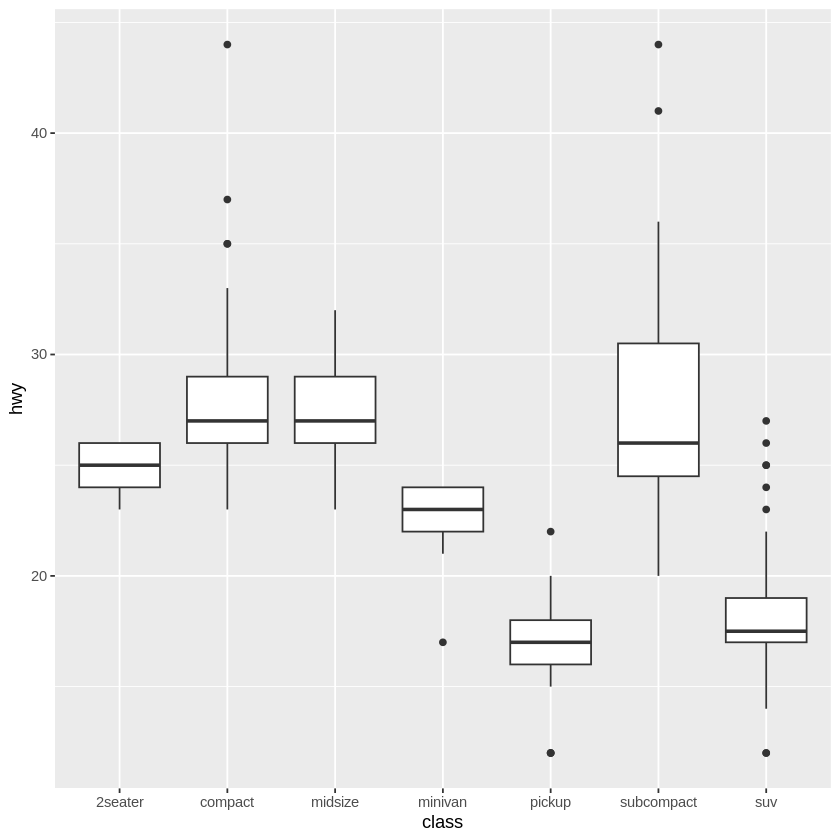

In [109]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +geom_boxplot()

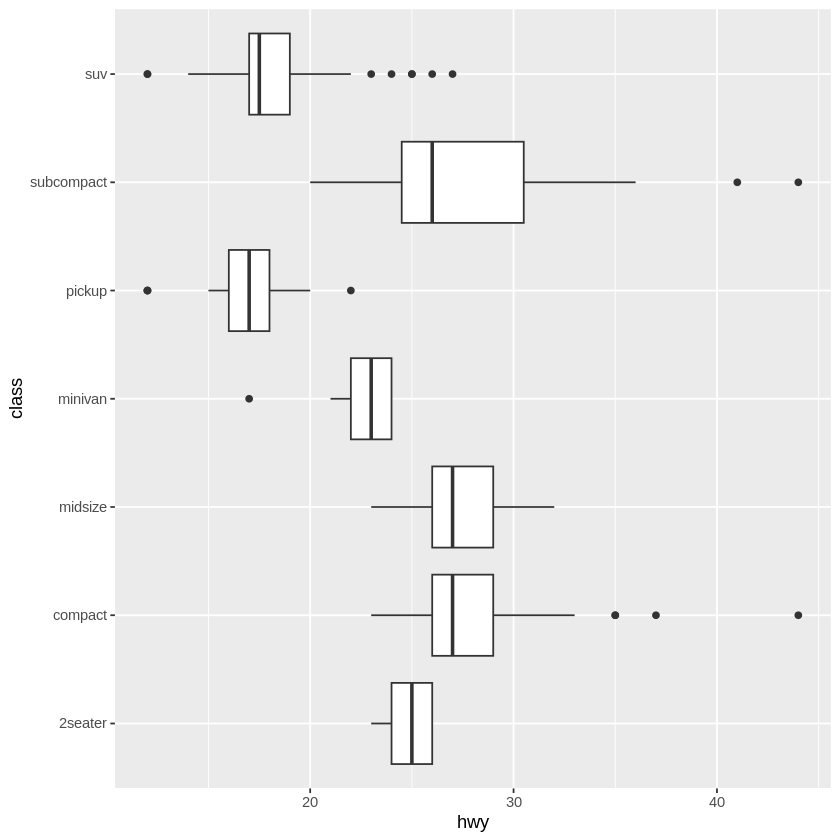

In [110]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +
  geom_boxplot() +
  coord_flip()

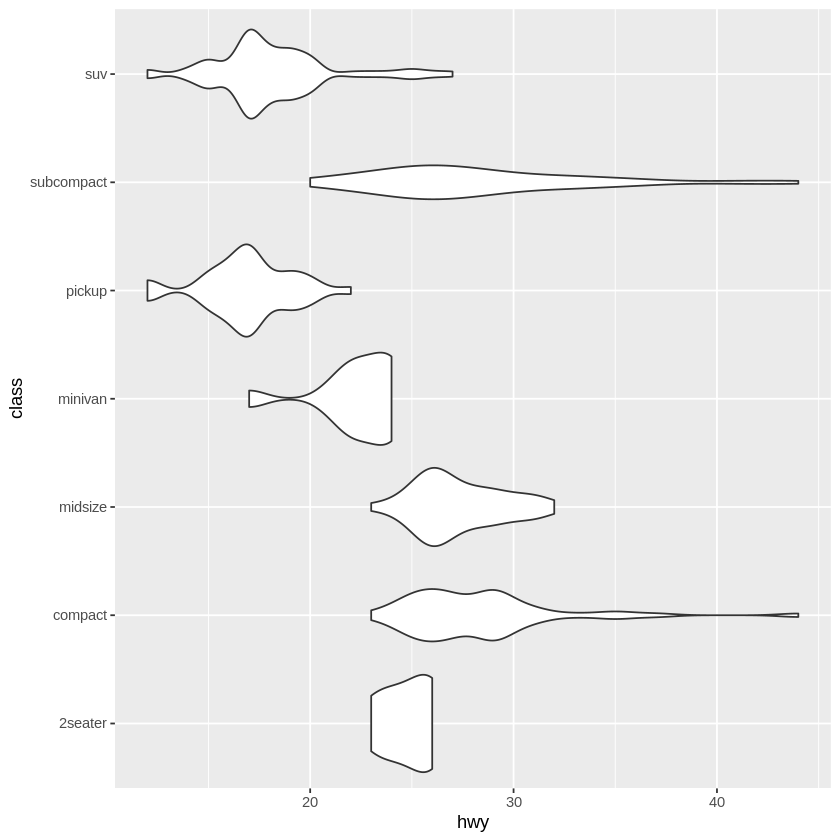

In [111]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +
  geom_violin() +
  coord_flip()

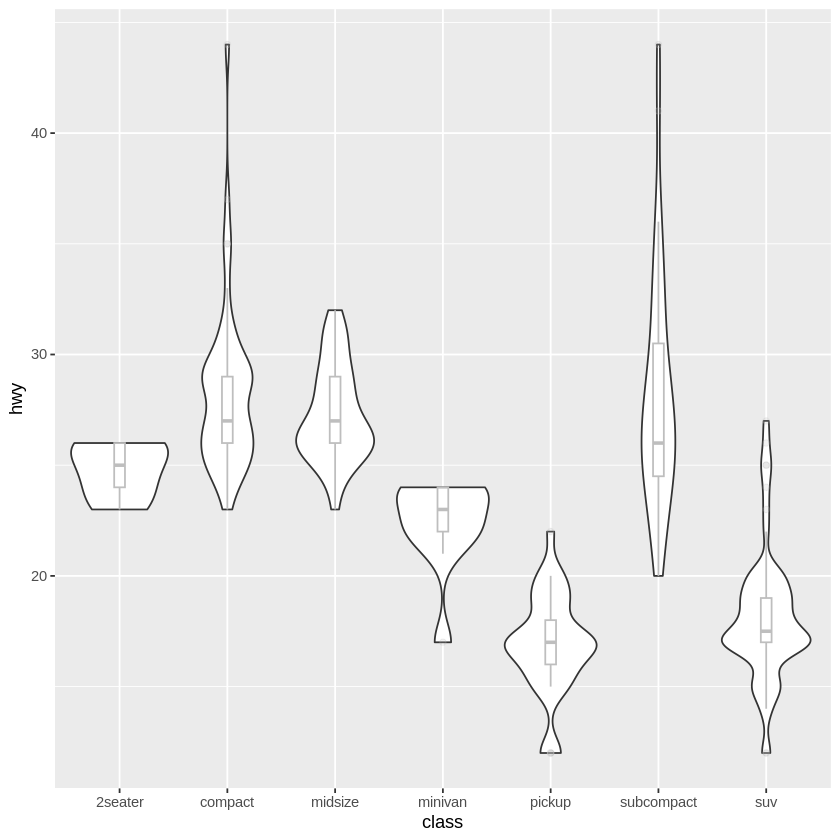

In [112]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +
  geom_violin() + geom_boxplot(width=0.1, color="grey", alpha=0.2)

### Theme

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


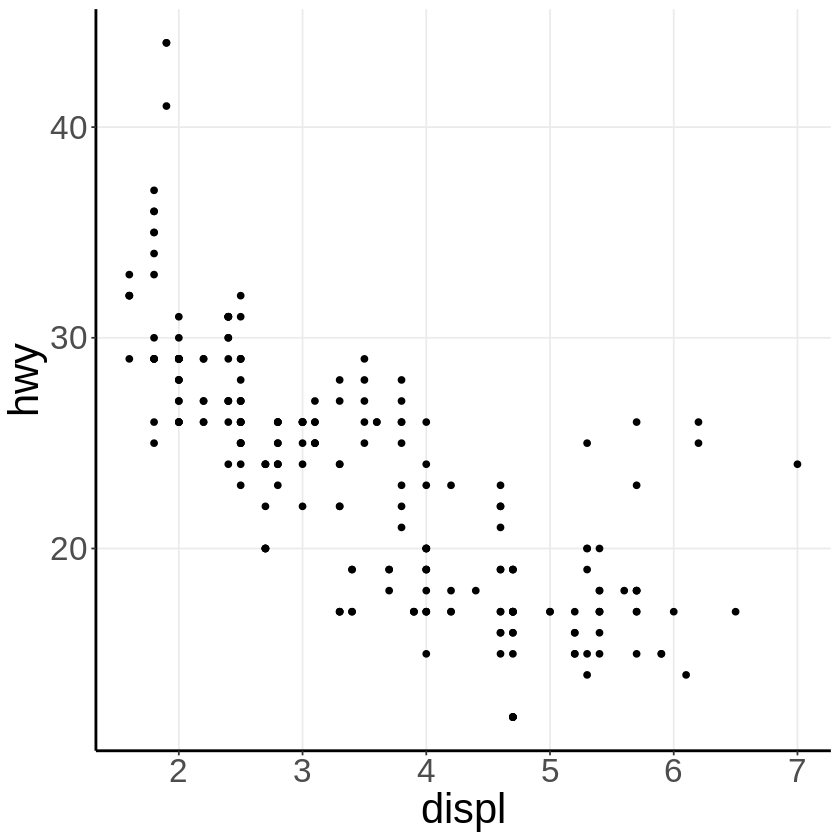

In [113]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) + theme_bw() +
  theme(axis.line= element_line(size=.8, colour = "black"),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        text = element_text(size = 25))

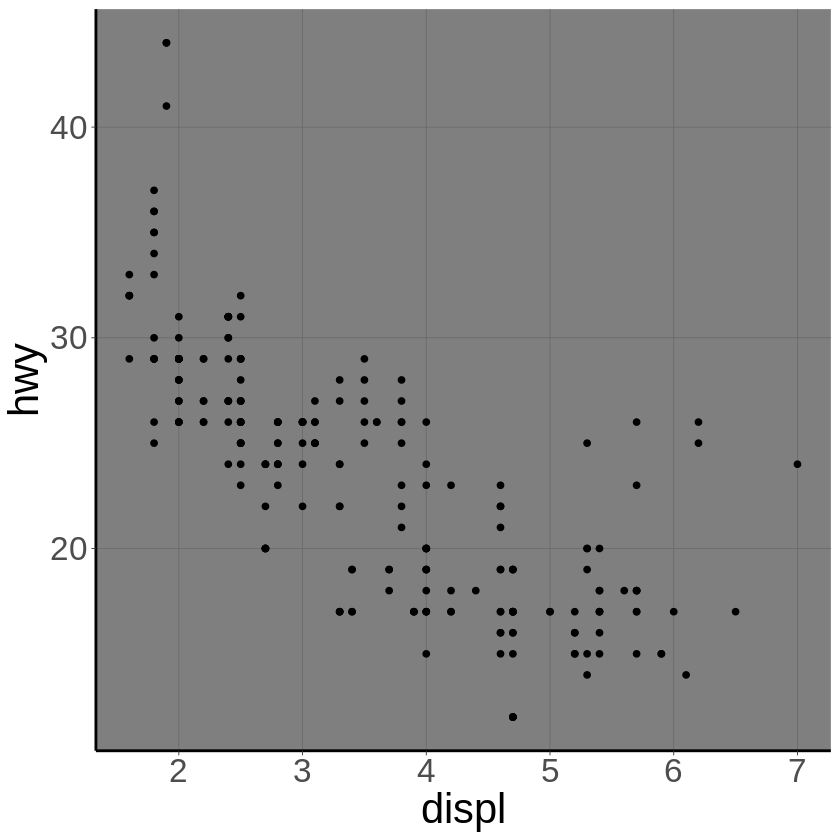

In [114]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) + theme_dark() +
  theme(axis.line= element_line(size=.8, colour = "black"),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        text = element_text(size = 25))

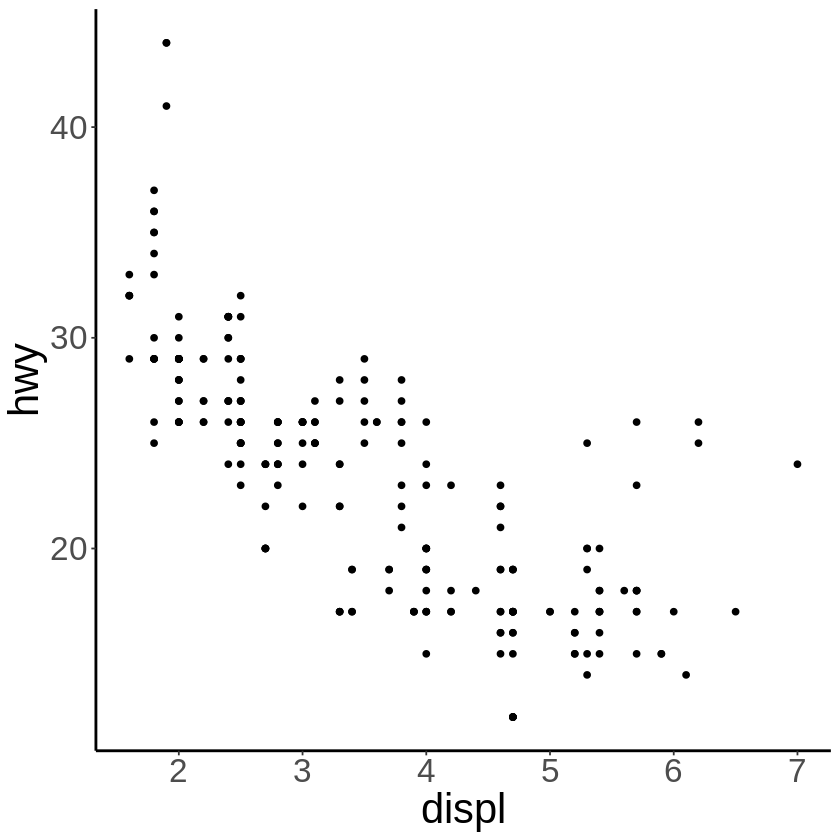

In [115]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) + theme_test() +
  theme(axis.line= element_line(size=.8, colour = "black"),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        text = element_text(size = 25))

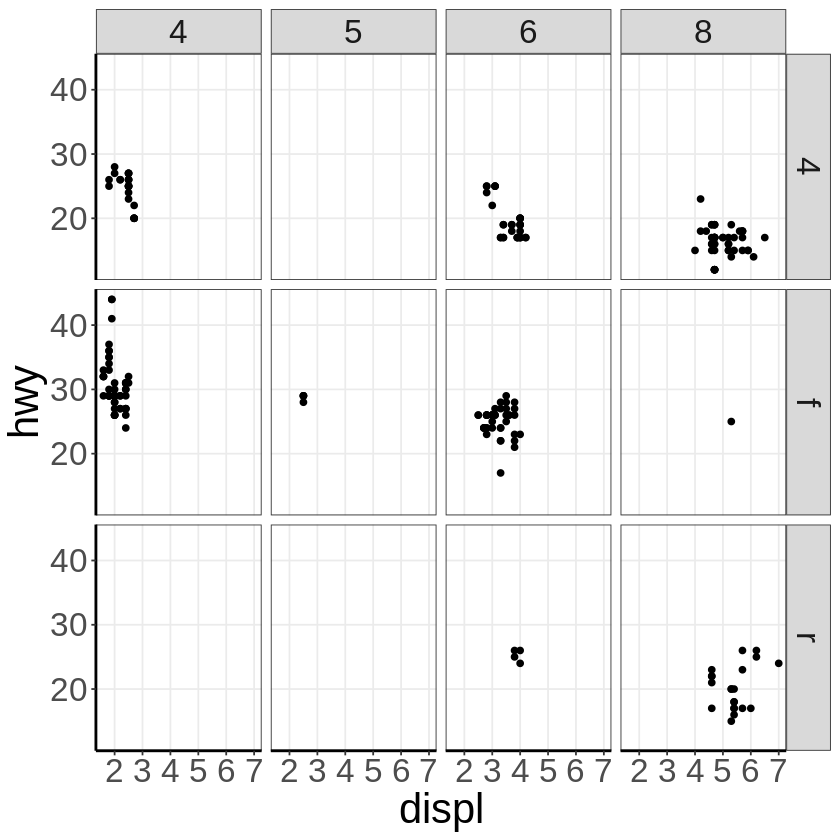

In [116]:
ggplot(data = mpg) + theme_bw() +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_grid(drv ~ cyl)  +
  theme(axis.line= element_line(size=.8, colour = "black"),
        panel.grid.minor = element_blank(),
        text = element_text(size = 25))

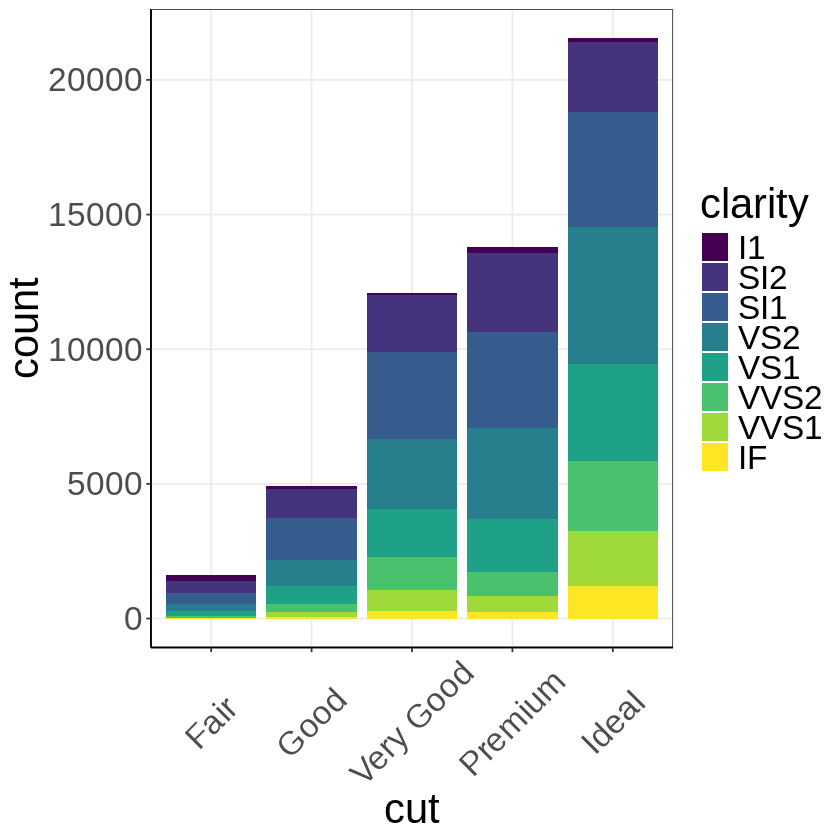

In [117]:
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, fill = clarity)) + theme_bw() +
  theme(axis.line= element_line(colour = "black"),
        panel.grid.minor = element_blank(),
#        panel.border = element_blank(),
        text = element_text(size = 25),
        axis.text.x = element_text(angle= 45, vjust = .5)
        )

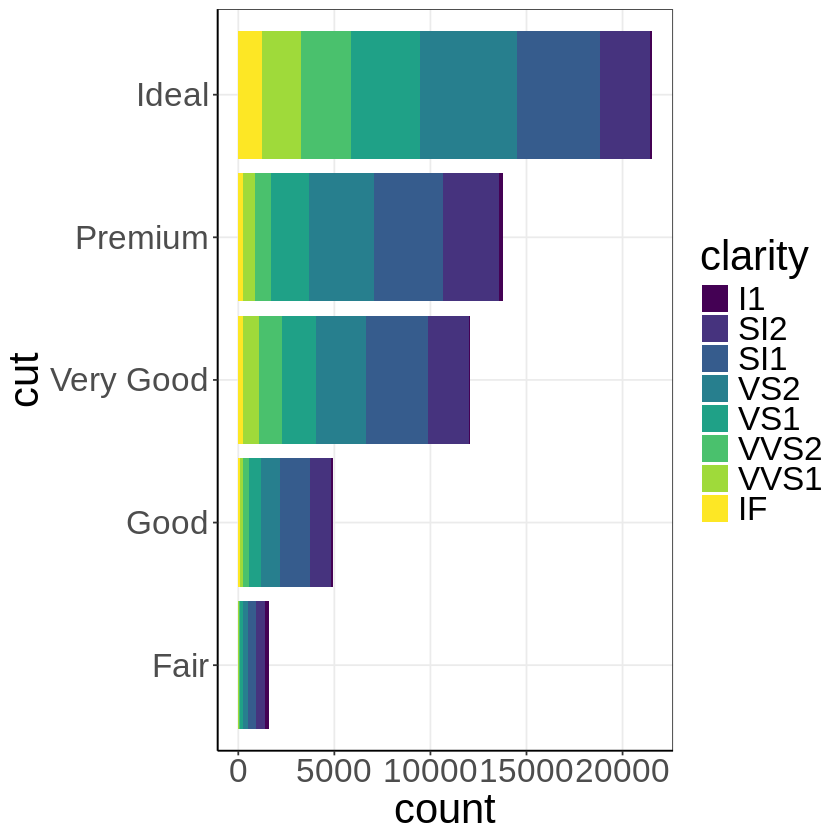

In [118]:
# png("Fig.png", width = 7, height = 3, units = 'in', res = 300)
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, fill = clarity)) + theme_bw() +
  theme(axis.line= element_line(colour = "black"),
        panel.grid.minor = element_blank(),
#        panel.border = element_blank(),
        text = element_text(size = 25),
#        axis.text.x = element_text(angle= 45, vjust = .5)
        ) +   coord_flip()
#dev.off()

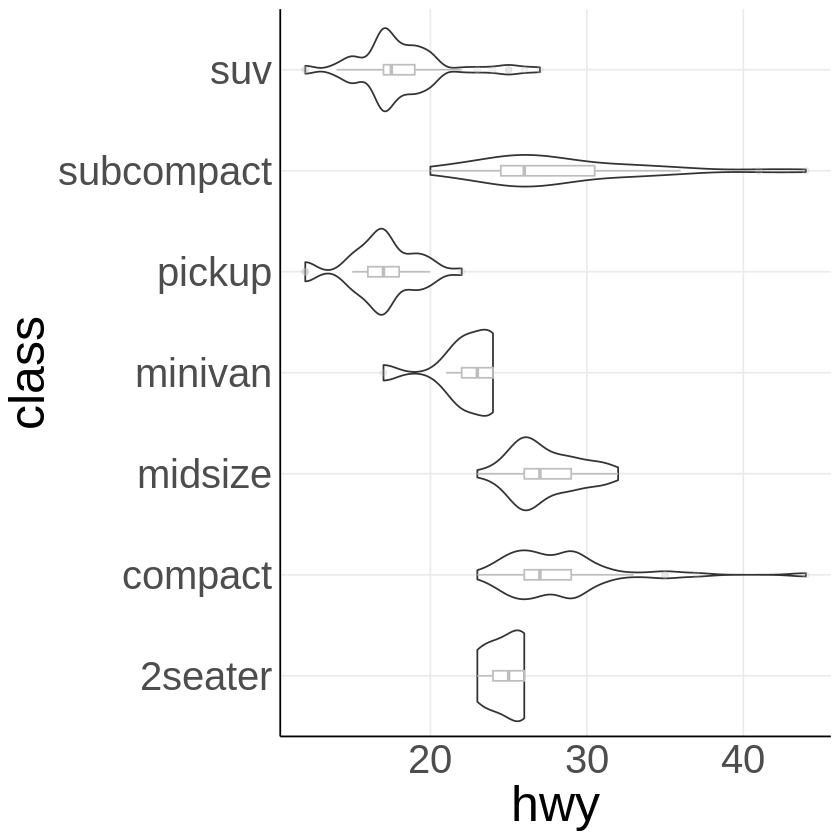

In [119]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +
  geom_violin() + geom_boxplot(width=0.1, color="grey", alpha=0.2) + theme_minimal()+
  theme(axis.line= element_line(colour = "black"),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        text = element_text(size = 30),
        ) +   coord_flip()